#Trabalho Final Data Mining

## Carregar base de Dados

In [1]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [2]:
# Carregamento de Dados de Treino
data = pd.read_csv('horse.csv')
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
# Carregamento de Dados de Teste
data_test = pd.read_csv('horseTest.csv')
data_test.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,1,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
1,no,adult,2,39.1,72.0,52.0,warm,NaN,bright_pink,less_3_sec,depressed,hypermotile,slight,none,none,NaN,absent,distend_small,50.0,7.8,NaN,NaN,lived,yes,2111,0,0,no
2,yes,adult,3,37.2,42.0,12.0,warm,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_large,NaN,7.0,NaN,NaN,lived,no,4124,0,0,no
3,no,young,4,38.0,92.0,28.0,normal,normal,bright_pink,less_3_sec,alert,hypomotile,slight,significant,NaN,7.2,normal,normal,37.0,6.1,clear,NaN,died,no,0,0,0,yes
4,yes,adult,5,37.6,64.0,21.0,normal,normal,bright_pink,less_3_sec,depressed,hypomotile,none,none,none,NaN,increased,distend_large,40.0,7.0,clear,NaN,lived,yes,4205,0,0,yes


In [4]:
data.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [5]:
len(data)

299

In [6]:
data.shape

(299, 28)

In [7]:
data_test.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,89.000000,73.000000,84.000000,73.000000,14.000000,82.000000,79.000000,29.000000,89.000000,89.000000,89.000000
mean,45.000000,38.175342,74.797619,34.232877,5.028571,45.621951,22.930380,2.782759,4582.415730,218.483146,24.820225
std,25.836021,0.808768,31.099831,19.158346,1.728240,9.196940,26.512955,2.251042,7088.406982,1082.038807,234.153532
min,1.000000,36.000000,36.000000,9.000000,2.000000,31.000000,3.300000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,37.800000,52.500000,20.000000,4.125000,39.000000,6.500000,1.300000,2111.000000,0.000000,0.000000
50%,45.000000,38.100000,65.000000,30.000000,5.150000,44.000000,7.300000,2.000000,3111.000000,0.000000,0.000000
75%,67.000000,38.600000,93.000000,42.000000,6.625000,50.000000,54.500000,3.200000,4206.000000,0.000000,0.000000
max,89.000000,40.800000,184.000000,90.000000,7.200000,74.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [8]:
len(data_test)

89

In [9]:
data_test.shape

(89, 28)

##Análise exploratória

In [10]:
#identificação de registros duplicados no parâmetro "hospital_number" - Base Treino
ids = data['hospital_number']
data1=data[ids.isin(ids[ids.duplicated()])].sort_values('hospital_number')
len(data1)

32

In [11]:
#identificação de registros duplicados no parâmetro "hospital_number" - Base Teste
ids = data_test['hospital_number']
data1=data_test[ids.isin(ids[ids.duplicated()])].sort_values('hospital_number')
len(data1)

0

In [12]:
#excluir valores duplicados, mantendo o último registro - Treino
data=data.drop_duplicates(subset='hospital_number', keep="last")
len(data)

283

In [13]:
data=data.reset_index()

In [14]:
data.tail()

,index,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
278,294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
279,295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
280,296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
281,297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes
282,298,yes,adult,534618,37.2,40.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,absent,normal,36.0,62.0,clear,1.0,euthanized,no,6112,0,0,no


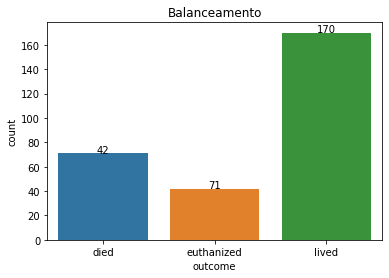

In [15]:
# Balanceamento
graph = sns.countplot(data=data, x='outcome')
plt.title('Balanceamento')

for idx, bar in enumerate(graph.patches):
    height = bar.get_height()
    graph.text(x=bar.get_x() + bar.get_width()/2., y=height + 0.1, s=(data['outcome'].value_counts()).sort_values()[idx], ha="center")

plt.show()

In [16]:
# criação da nova categoria Died = Died + Euthanized (Treino)

for i  in range(283):
    situacao = data['outcome'].iloc[i]
    if situacao == 'lived':
      data.loc[i,'outcome2']='lived'
    if situacao == 'euthanized':
      data.loc[i,'outcome2']='died'
    if situacao == 'died':
      data.loc[i,'outcome2']='died'    




In [17]:
# criação da nova categoria Died = Died + Euthanized (Teste)

for i  in range(89):
    situacao = data_test['outcome'].iloc[i]
    if situacao == 'lived':
      data_test.loc[i,'outcome2']='lived'
    if situacao == 'euthanized':
      data_test.loc[i,'outcome2']='died'
    if situacao == 'died':
      data_test.loc[i,'outcome2']='died' 

In [18]:
data_test.outcome2.unique()

array(['died', 'lived'], dtype=object)

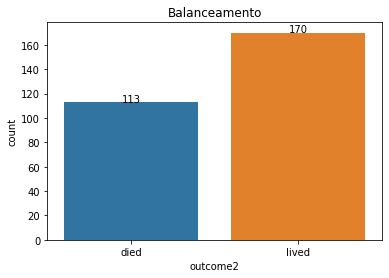

In [19]:
# Nova Balanceamento - Treino
graph = sns.countplot(data=data, x='outcome2')
plt.title('Balanceamento')

for idx, bar in enumerate(graph.patches):
    height = bar.get_height()
    graph.text(x=bar.get_x() + bar.get_width()/2., y=height + 0.1, s=(data['outcome2'].value_counts()).sort_values()[idx], ha="center")

plt.show()

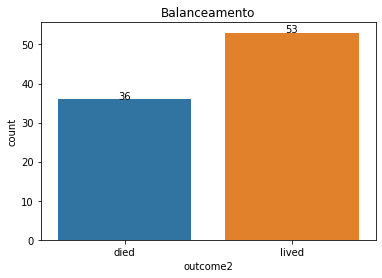

In [20]:
# Nova Balanceamento - Test
graph = sns.countplot(data=data_test, x='outcome2')
plt.title('Balanceamento')

for idx, bar in enumerate(graph.patches):
    height = bar.get_height()
    graph.text(x=bar.get_x() + bar.get_width()/2., y=height + 0.1, s=(data_test['outcome2'].value_counts()).sort_values()[idx], ha="center")

plt.show()

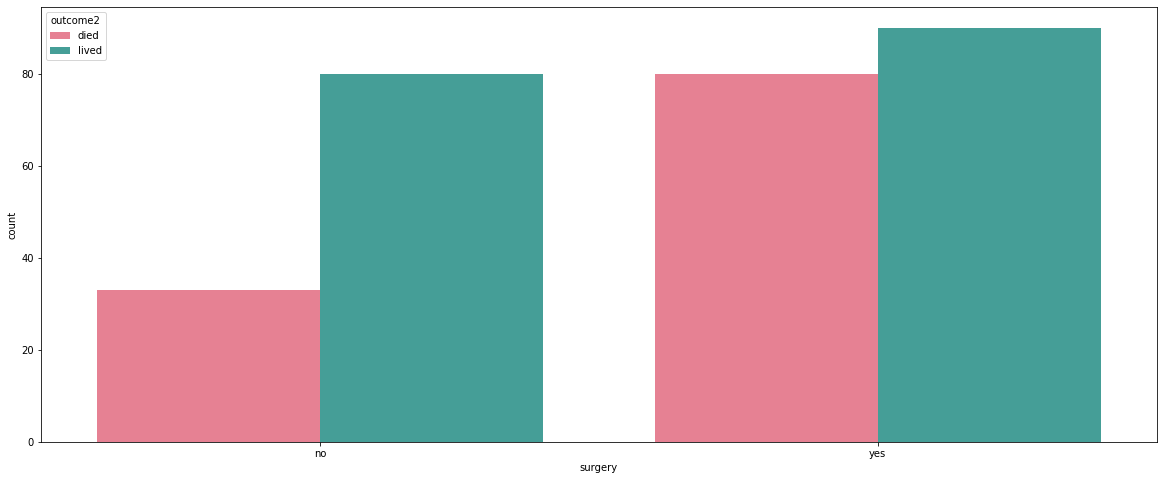

In [21]:
# Atributo surgery
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='surgery', hue='outcome2', palette='husl')
plt.show()

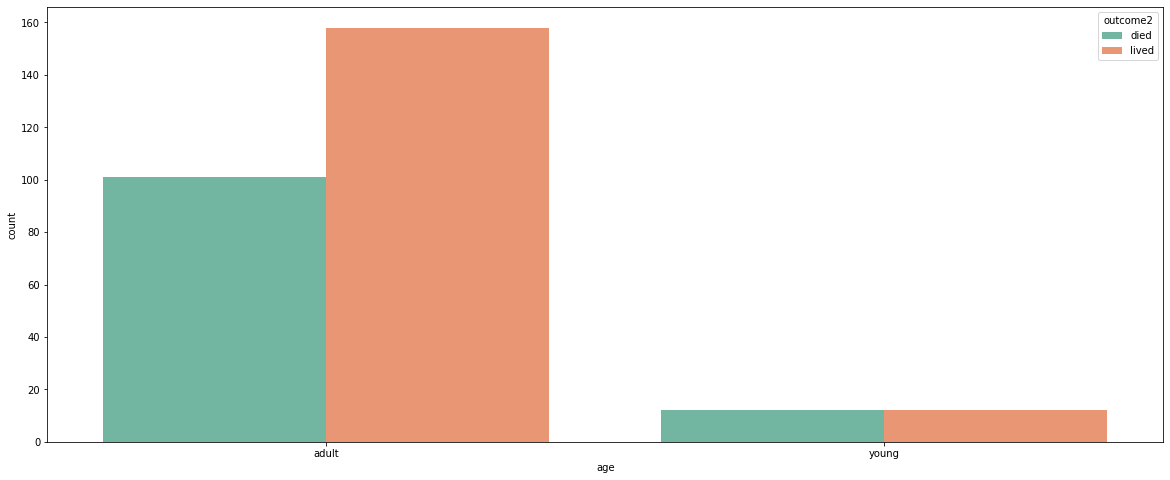

In [22]:
# Atributo age
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='age', hue='outcome2', palette='Set2')
plt.show()

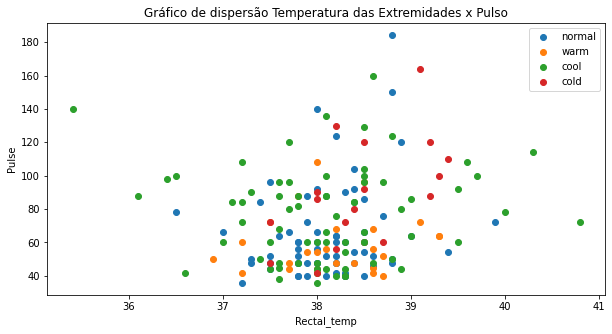

In [23]:
#Gráfico de Dispersão Temperatura of Extremities (Rectal_temp x Pulse)
normal = data[data.temp_of_extremities == 'normal']
warm = data[data.temp_of_extremities == 'warm']
cool = data[data.temp_of_extremities == 'cool']
cold = data[data.temp_of_extremities == 'cold']

plt.figure(figsize=(10,5))
plt.scatter(data=normal, x='rectal_temp', y='pulse', label='normal')
plt.scatter(data=warm, x='rectal_temp', y='pulse', label='warm')
plt.scatter(data=cool, x='rectal_temp', y='pulse', label='cool')
plt.scatter(data=cold, x='rectal_temp', y='pulse', label='cold')


plt.xlabel('Rectal_temp')
plt.ylabel('Pulse')
plt.title('Gráfico de dispersão Temperatura das Extremidades x Pulso')

plt.legend()
plt.show()

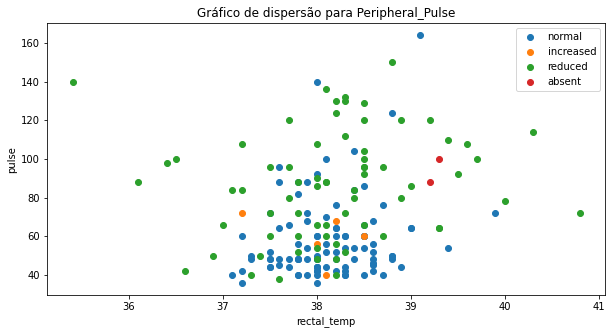

In [24]:
#Gráfico de Dispersão peripheral pulse (Retal Temperature x Pulse)
normal = data[data.peripheral_pulse == 'normal']
increased = data[data.peripheral_pulse == 'increased']
reduced = data[data.peripheral_pulse == 'reduced']
absent = data[data.peripheral_pulse == 'absent']

plt.figure(figsize=(10,5))
plt.scatter(data=normal, x='rectal_temp', y='pulse', label='normal')
plt.scatter(data=increased, x='rectal_temp', y='pulse', label='increased')
plt.scatter(data=reduced, x='rectal_temp', y='pulse', label='reduced')
plt.scatter(data=absent, x='rectal_temp', y='pulse', label='absent')


plt.xlabel('rectal_temp')
plt.ylabel('pulse')
plt.title('Gráfico de dispersão para Peripheral_Pulse')

plt.legend()
plt.show()

In [25]:
print(data['mucous_membrane'].unique())

[nan 'pale_cyanotic' 'pale_pink' 'dark_cyanotic' 'normal_pink'
 'bright_red' 'bright_pink']


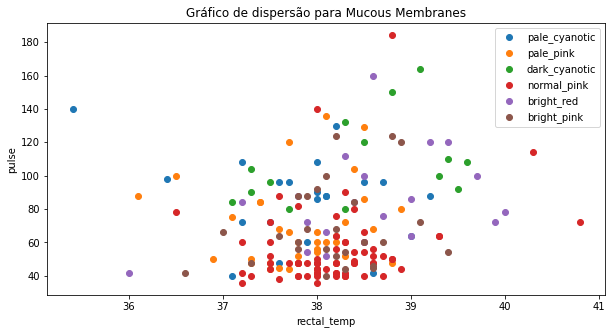

In [26]:
#Gráfico de Dispersão mucous membranes (Retal Temperature x Pulse)
pale_cyanotic = data[data.mucous_membrane == 'pale_cyanotic']
pale_pink = data[data.mucous_membrane == 'pale_pink']
dark_cyanotic = data[data.mucous_membrane == 'dark_cyanotic']
normal_pink = data[data.mucous_membrane == 'normal_pink']
bright_red = data[data.mucous_membrane == 'bright_red']
bright_pink = data[data.mucous_membrane == 'bright_pink']

plt.figure(figsize=(10,5))
plt.scatter(data=pale_cyanotic, x='rectal_temp', y='pulse', label='pale_cyanotic')
plt.scatter(data=pale_pink, x='rectal_temp', y='pulse', label='pale_pink')
plt.scatter(data=dark_cyanotic, x='rectal_temp', y='pulse', label='dark_cyanotic')
plt.scatter(data=normal_pink, x='rectal_temp', y='pulse', label='normal_pink')
plt.scatter(data=bright_red, x='rectal_temp', y='pulse', label='bright_red')
plt.scatter(data=bright_pink, x='rectal_temp', y='pulse', label='bright_pink')


plt.xlabel('rectal_temp')
plt.ylabel('pulse')
plt.title('Gráfico de dispersão para Mucous Membranes')

plt.legend()
plt.show()

In [27]:
np.where(data["capillary_refill_time"] == '3')

(array([74]),)

In [28]:
data.iloc[74]

index                               85
surgery                             no
age                              adult
hospital_number                 529304
rectal_temp                         38
pulse                               54
respiratory_rate                    30
temp_of_extremities               warm
peripheral_pulse               reduced
mucous_membrane              pale_pink
capillary_refill_time                3
pain                         mild_pain
peristalsis                hypermotile
abdominal_distention            slight
nasogastric_tube                slight
nasogastric_reflux        less_1_liter
nasogastric_reflux_ph              NaN
rectal_exam_feces                  NaN
abdomen                  distend_small
packed_cell_volume                  45
total_protein                      6.2
abdomo_appearance                  NaN
abdomo_protein                     NaN
outcome                          lived
surgical_lesion                     no
lesion_1                 

In [29]:
#transformação no atributo "capillary_refill_time" - 3s and more_3_sec -> more_iqual_3_sec (treino)
data.loc[data.capillary_refill_time=='3','capillary_refill_time']='more_3_sec'

In [30]:
data.loc[data.capillary_refill_time=='more_3_sec','capillary_refill_time']='more_iqual_3_sec'

In [31]:
print(data['capillary_refill_time'].unique())

['more_iqual_3_sec' 'less_3_sec' nan]


In [32]:
data_test.capillary_refill_time.unique()

array(['more_3_sec', 'less_3_sec', '3', nan], dtype=object)

In [33]:
#transformação no atributo "capillary_refill_time" - 3s and more_3_sec -> more_iqual_3_sec(test)
data_test.loc[data_test.capillary_refill_time=='3','capillary_refill_time']='more_3_sec'

In [34]:
data_test.loc[data_test.capillary_refill_time=='more_3_sec','capillary_refill_time']='more_iqual_3_sec'

In [35]:
print(data_test['capillary_refill_time'].unique())

['more_iqual_3_sec' 'less_3_sec' nan]


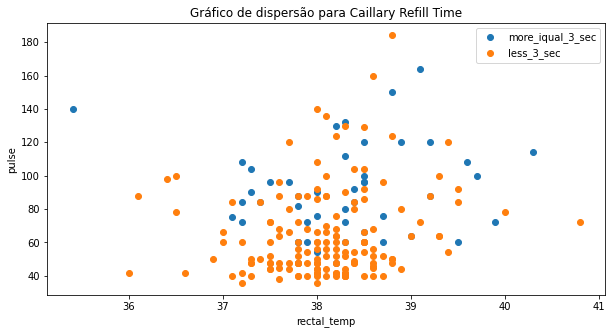

In [36]:
#Gráfico de Dispersão capillary refill time (Retal Temperature x Pulse)
more_iqual_3_sec = data[data.capillary_refill_time == 'more_iqual_3_sec']
less_3_sec = data[data.capillary_refill_time == 'less_3_sec']

plt.figure(figsize=(10,5))
plt.scatter(data=more_iqual_3_sec, x='rectal_temp', y='pulse', label='more_iqual_3_sec')
plt.scatter(data=less_3_sec, x='rectal_temp', y='pulse', label='less_3_sec')


plt.xlabel('rectal_temp')
plt.ylabel('pulse')
plt.title('Gráfico de dispersão para Caillary Refill Time')

plt.legend()
plt.show()

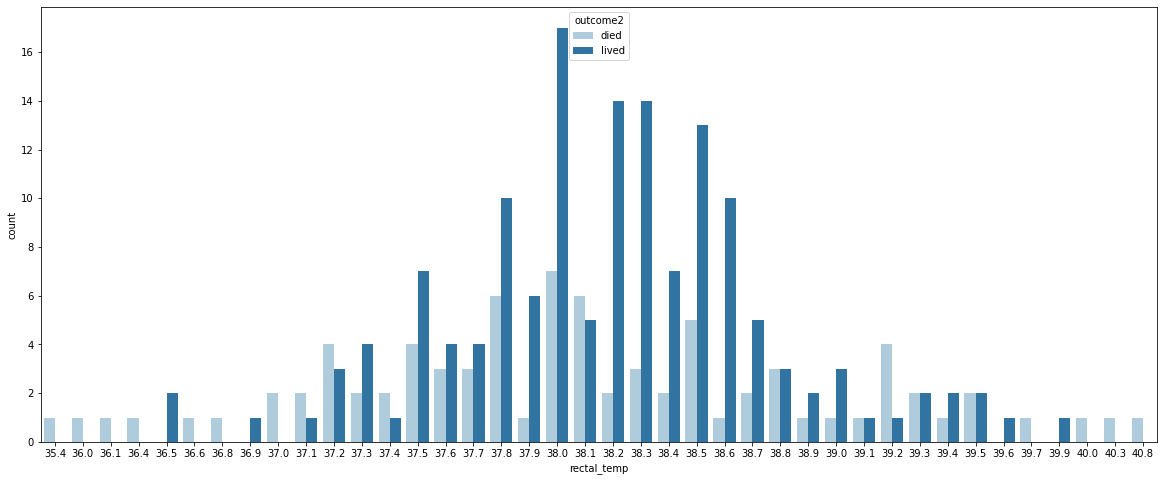

In [37]:
# Atributo rectal_temp
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='rectal_temp', hue='outcome2', palette='Paired')
plt.show()

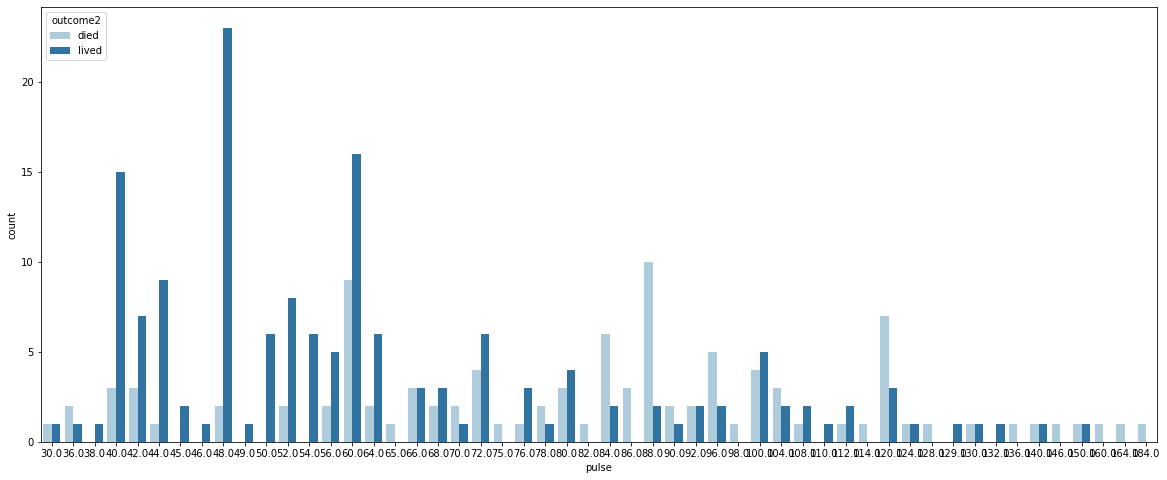

In [38]:
# Atributo pulse
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='pulse', hue='outcome2', palette='Paired')
plt.show()

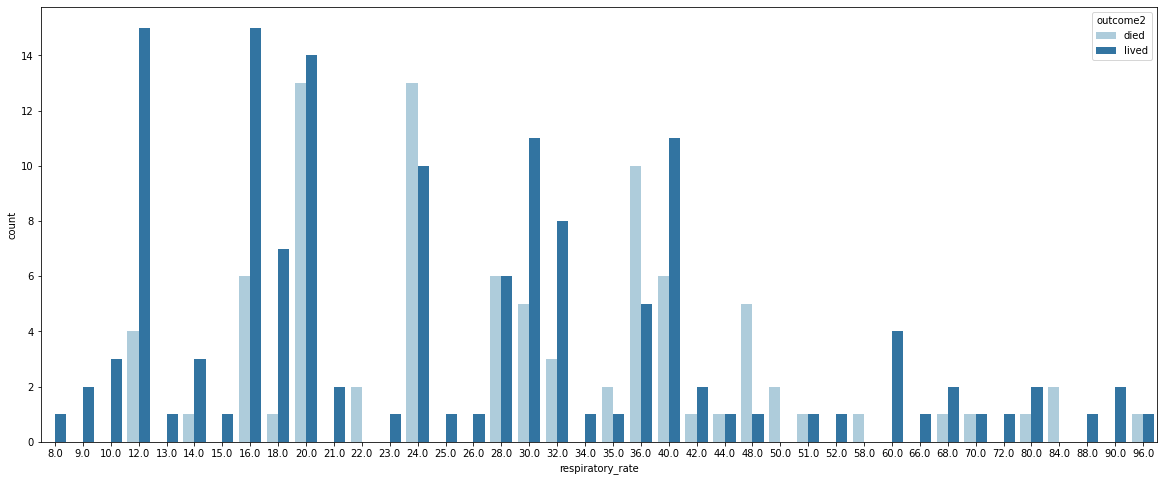

In [39]:
# Atributo respiratory_rate
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='respiratory_rate', hue='outcome2', palette='Paired')
plt.show()

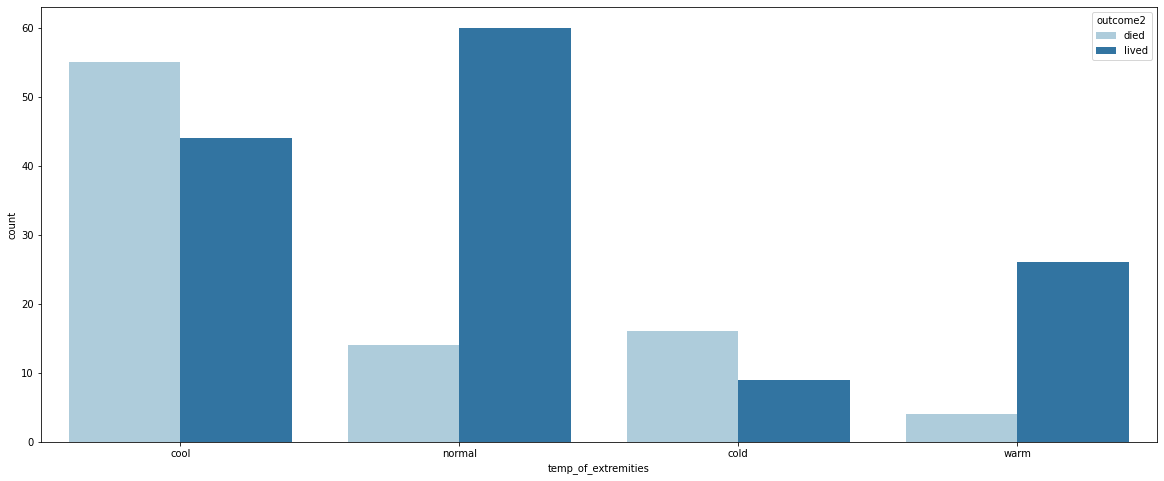

In [40]:
# Atributo temp_of_extremities	
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='temp_of_extremities', hue='outcome2', palette='Paired')
plt.show()

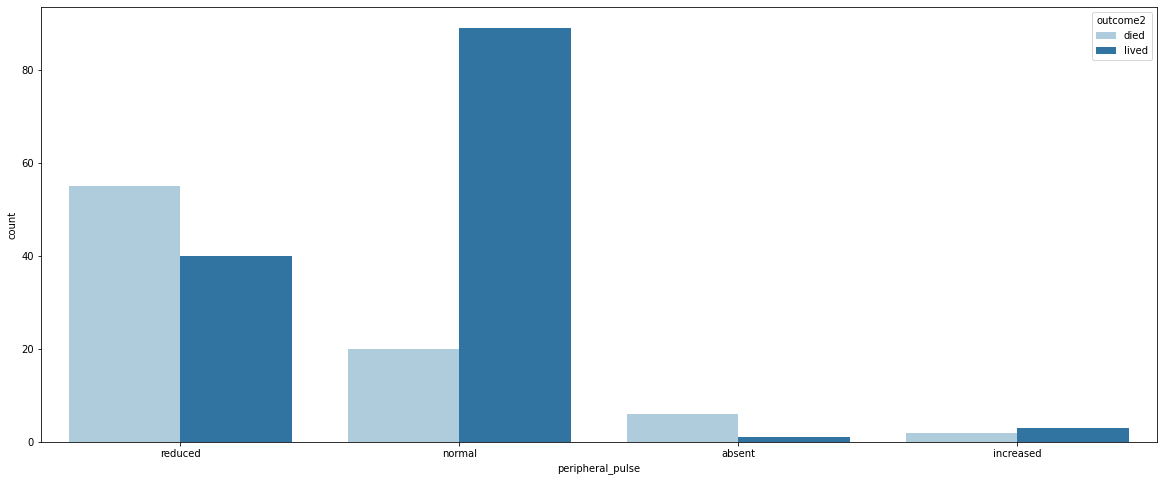

In [41]:
# Atributo peripheral_pulse	
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='peripheral_pulse', hue='outcome2', palette='Paired')
plt.show()

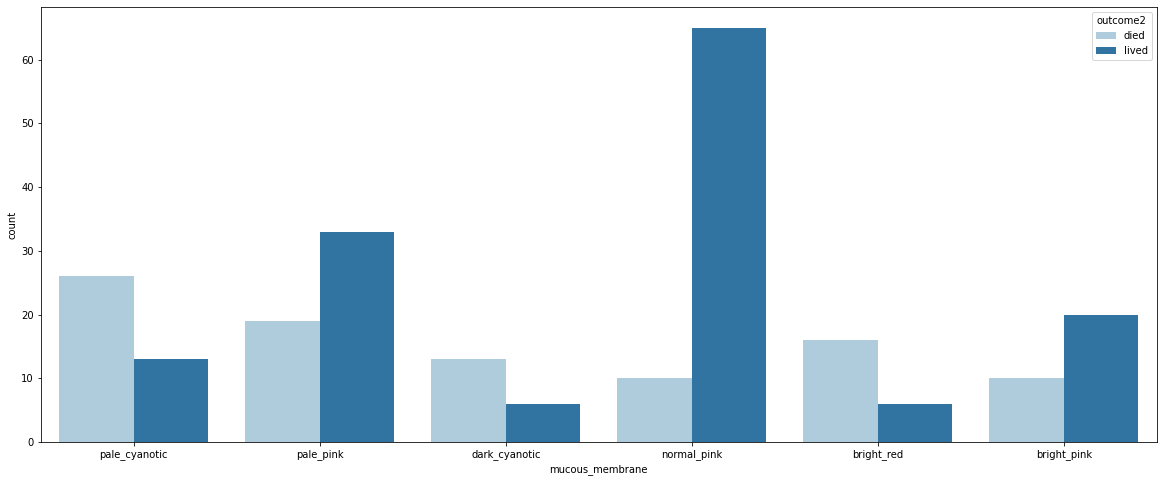

In [42]:
# Atributo mucous_membrane
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='mucous_membrane', hue='outcome2', palette='Paired')
plt.show()

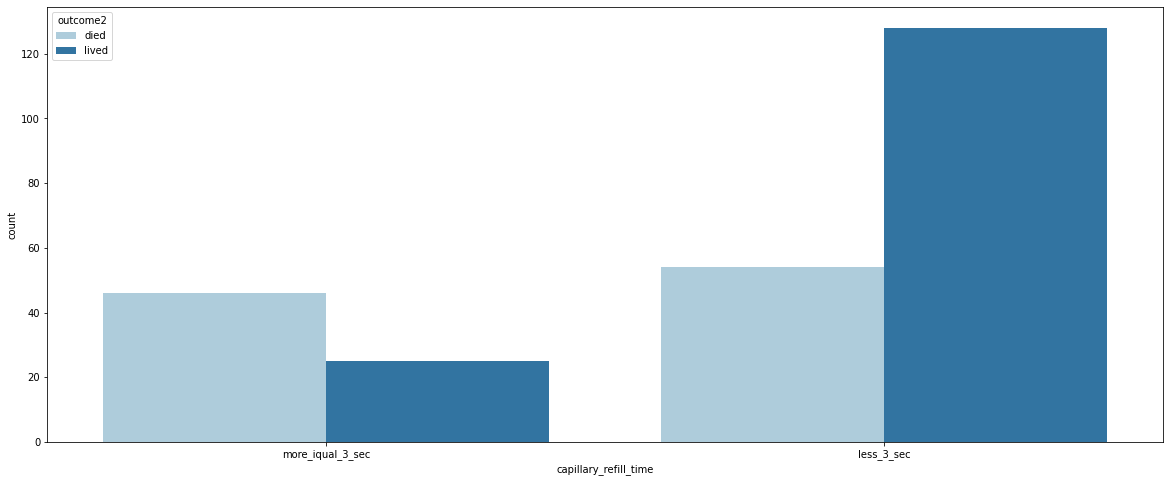

In [43]:
# Atributo 	capillary_refill_time
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='capillary_refill_time', hue='outcome2', palette='Paired')
plt.show()

In [44]:
data.head()

,index,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome2
0,0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_iqual_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no,died
1,1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no,died
2,2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes,lived
3,3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_iqual_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes,died
4,4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_iqual_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no,died


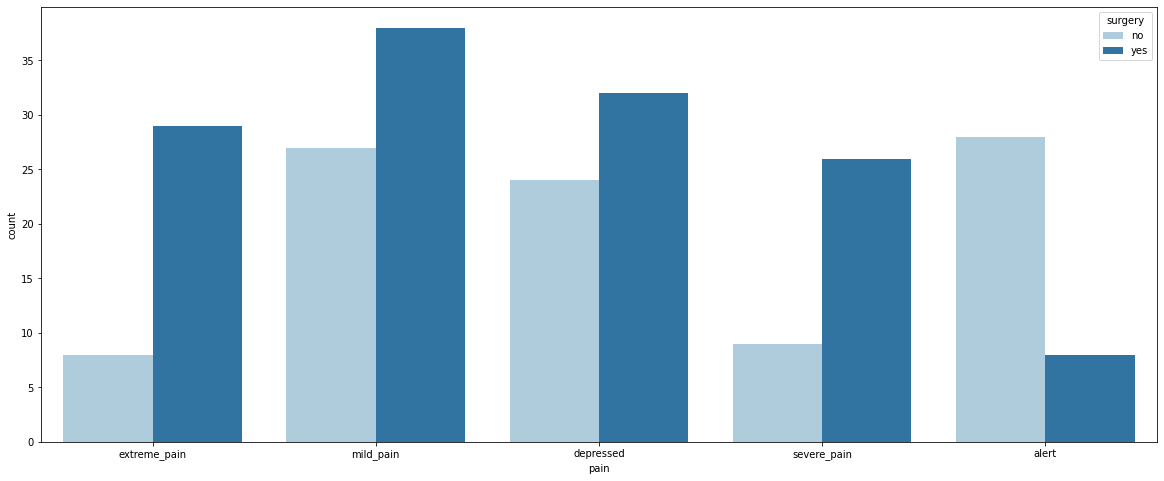

In [45]:
# Atributo 	pain
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='pain', hue='surgery', palette='Paired')
plt.show()


In [46]:
print(data['pain'].unique())

['extreme_pain' 'mild_pain' 'depressed' nan 'severe_pain' 'alert']


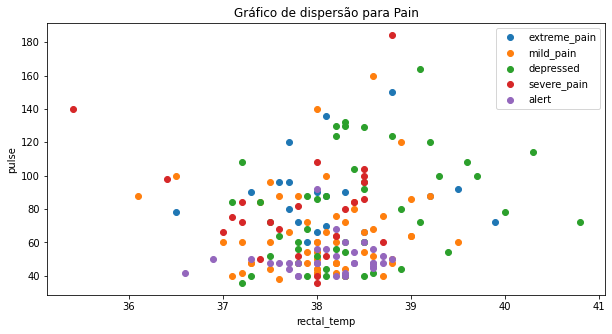

In [47]:
#Gráfico de Dispersão pain (Retal Temperature x Pulse)
extreme_pain = data[data.pain == 'extreme_pain']
mild_pain = data[data.pain == 'mild_pain']
depressed = data[data.pain == 'depressed']
severe_pain = data[data.pain == 'severe_pain']
alert = data[data.pain == 'alert']

plt.figure(figsize=(10,5))
plt.scatter(data=extreme_pain, x='rectal_temp', y='pulse', label='extreme_pain')
plt.scatter(data=mild_pain, x='rectal_temp', y='pulse', label='mild_pain')
plt.scatter(data=depressed, x='rectal_temp', y='pulse', label='depressed')
plt.scatter(data=severe_pain, x='rectal_temp', y='pulse', label='severe_pain')
plt.scatter(data=alert, x='rectal_temp', y='pulse', label='alert')

plt.xlabel('rectal_temp')
plt.ylabel('pulse')
plt.title('Gráfico de dispersão para Pain')

plt.legend()
plt.show()

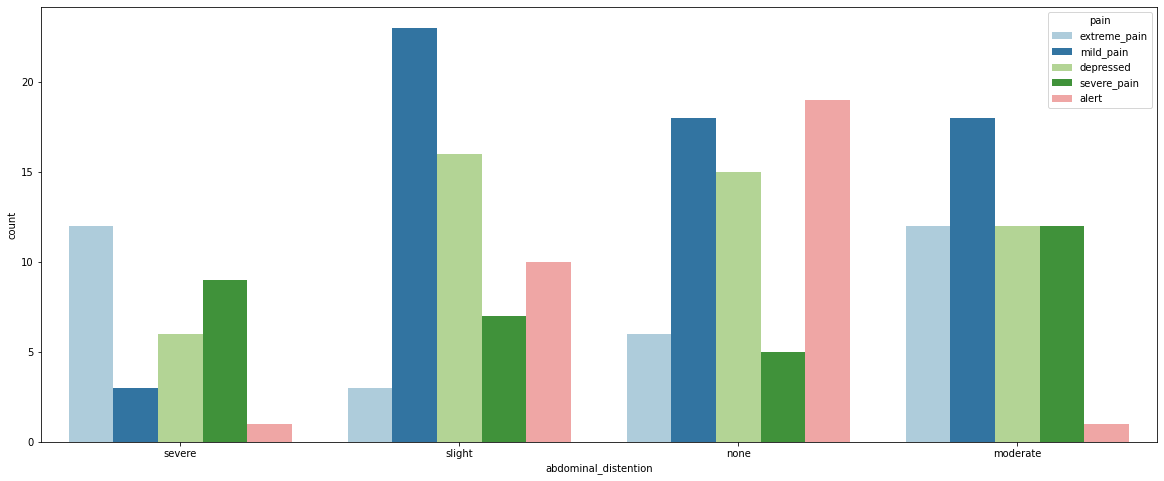

In [48]:
# Atributo 	peristalsis
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='abdominal_distention', hue='pain', palette='Paired')
plt.show()

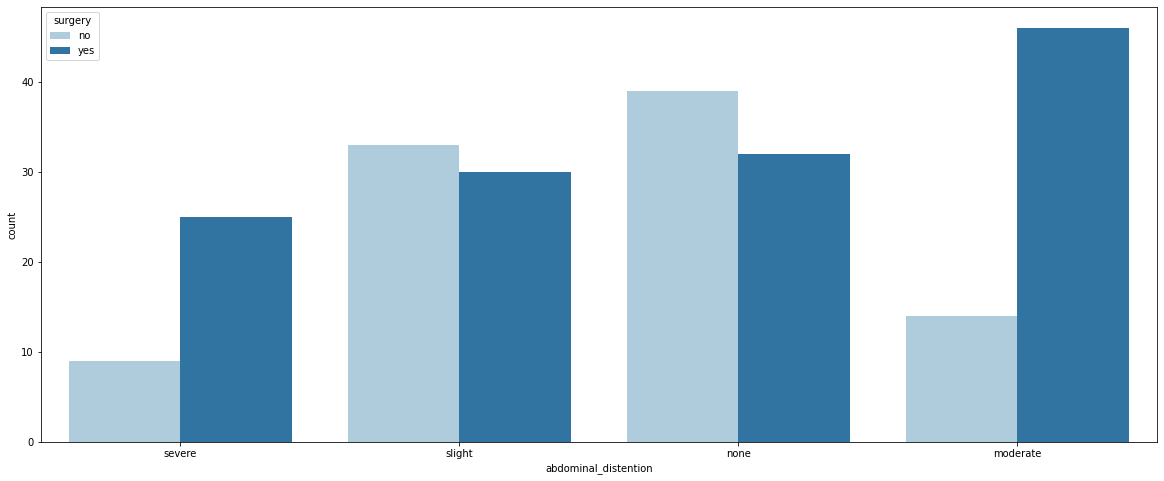

In [49]:
# Atributo 	peristalsis
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='abdominal_distention', hue='surgery', palette='Paired')
plt.show()

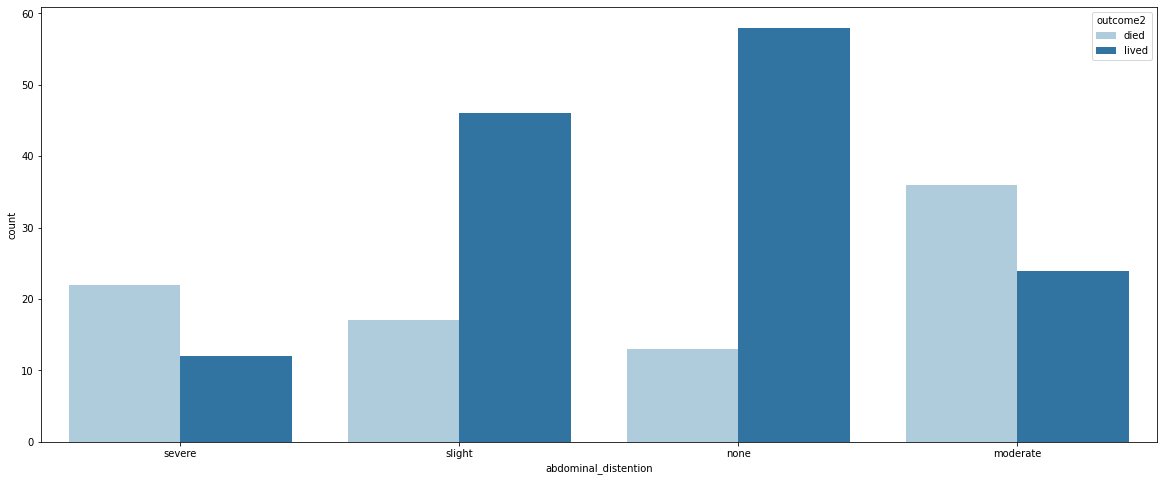

In [50]:
# Atributo 	abdominal_distention
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='abdominal_distention', hue='outcome2', palette='Paired')
plt.show()

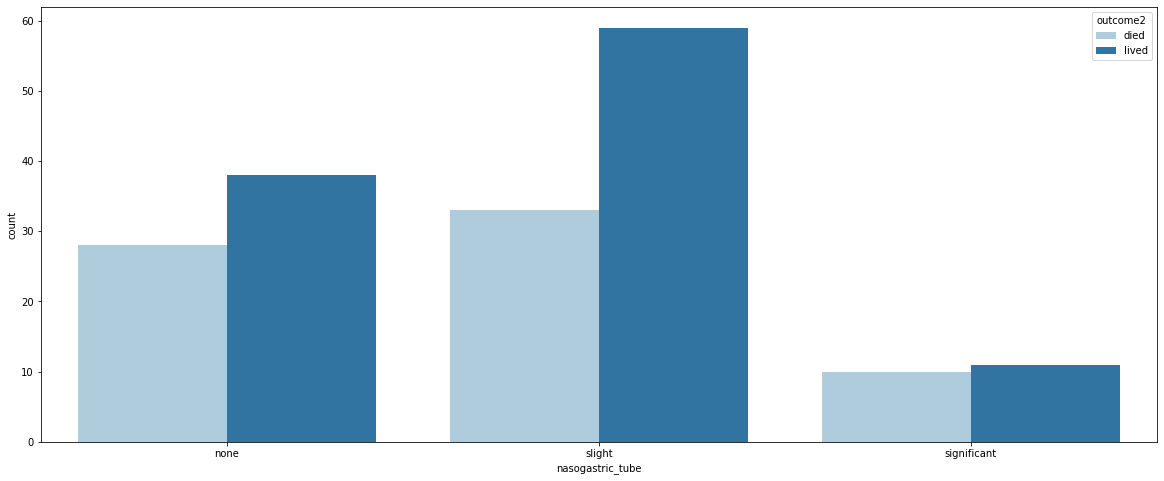

In [51]:
# Atributo 	nasogastric_tube
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='nasogastric_tube', hue='outcome2', palette='Paired')
plt.show()


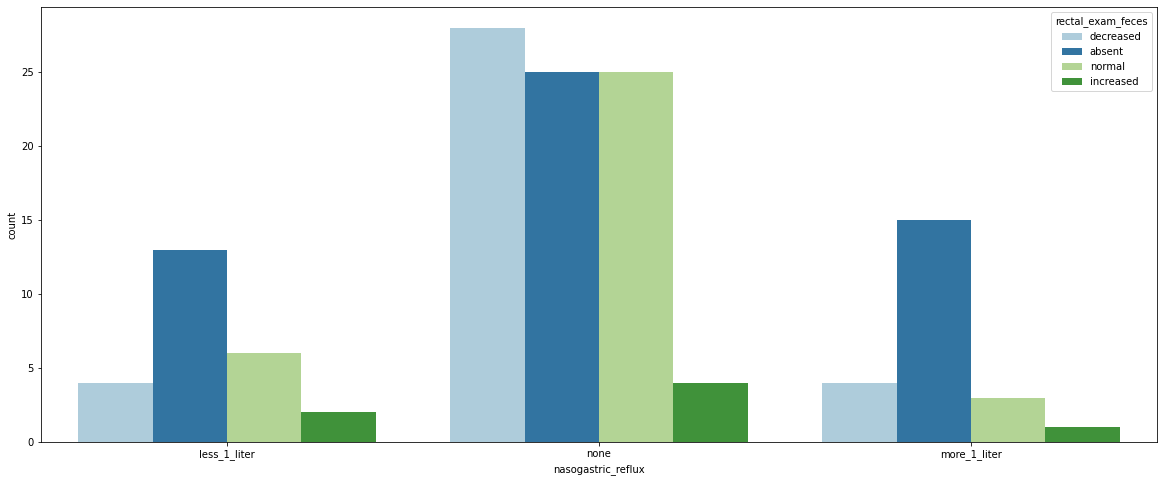

In [52]:
# Atributo 	nasogastric_reflux
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='nasogastric_reflux', hue='rectal_exam_feces', palette='Paired')
plt.show()

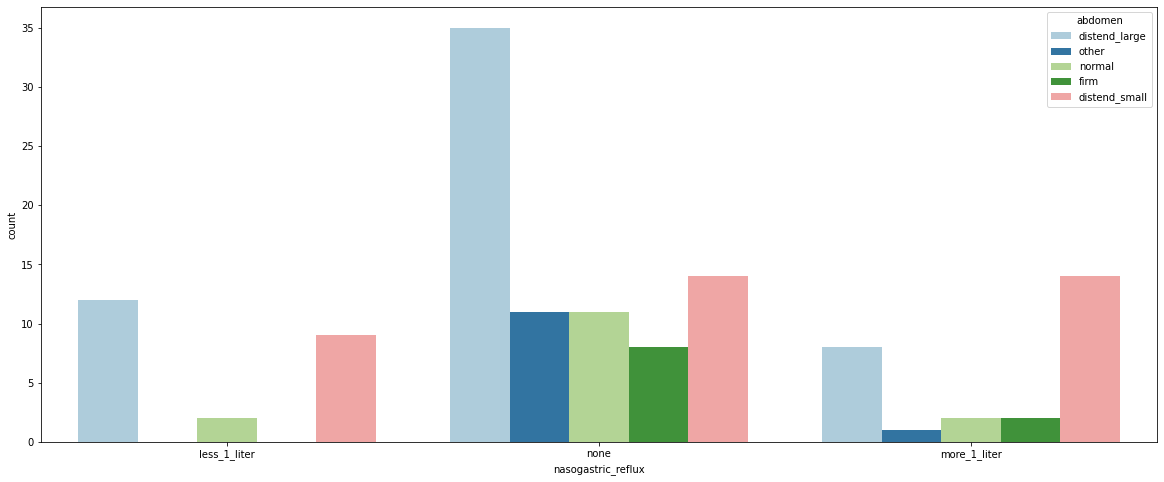

In [53]:
# Atributo 	nasogastric_reflux
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='nasogastric_reflux', hue='abdomen', palette='Paired')
plt.show()

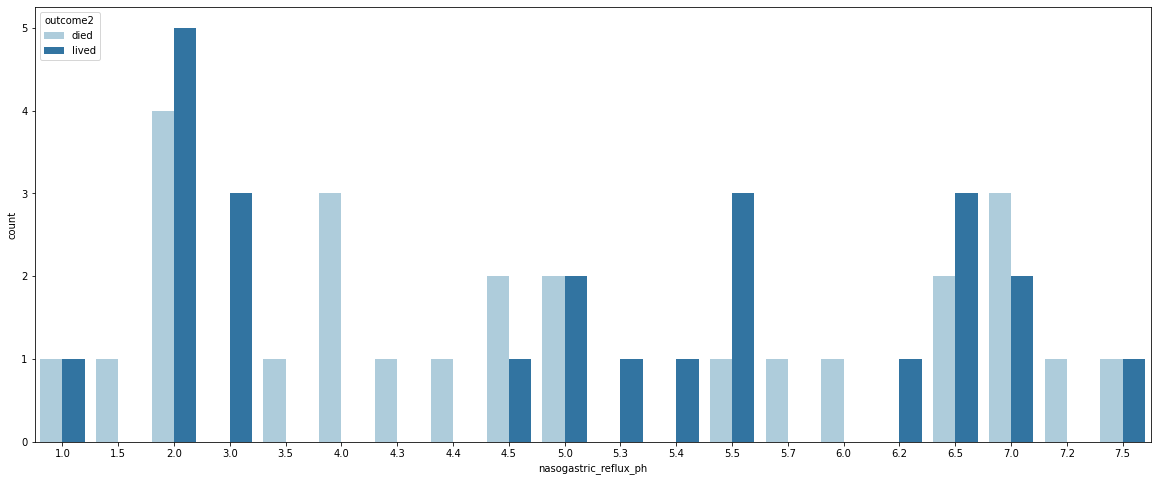

In [54]:
# Atributo 	nasogastric_reflux_ph
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='nasogastric_reflux_ph', hue='outcome2', palette='Paired')
plt.show()

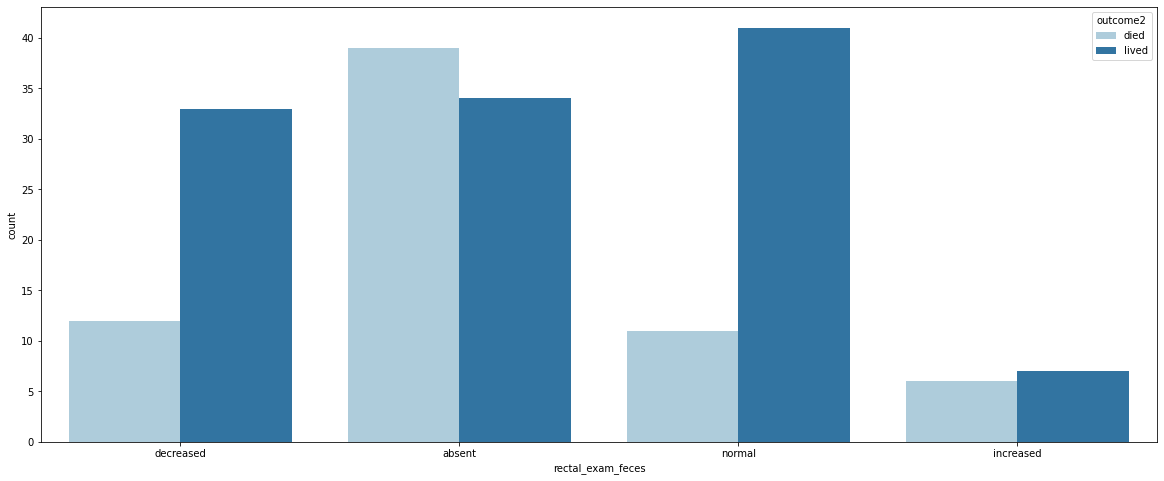

In [55]:
# Atributo rectal_exam_feces
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='rectal_exam_feces', hue='outcome2', palette='Paired')
plt.show()

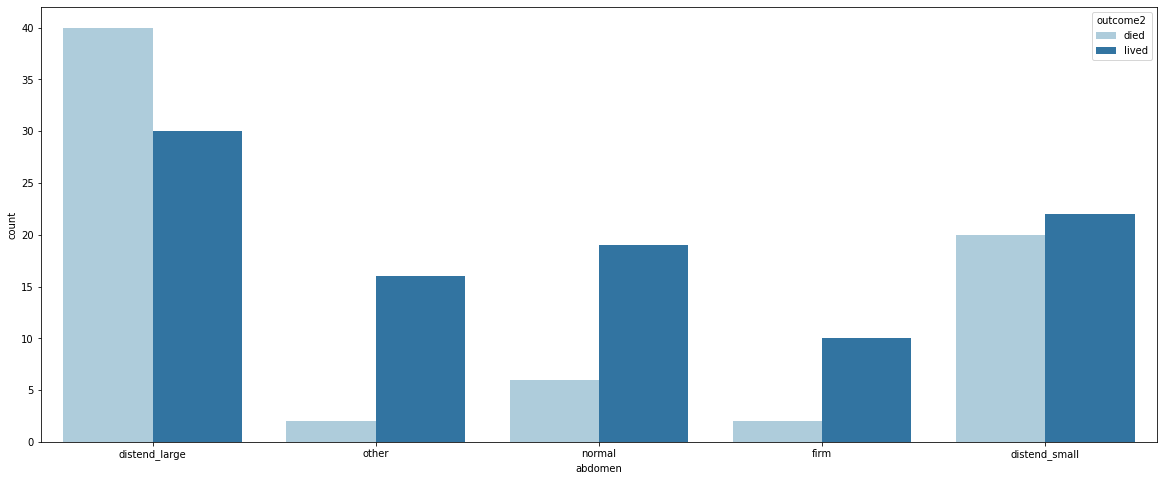

In [56]:
# Atributo 	abdomen
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='abdomen', hue='outcome2', palette='Paired')
plt.show()

In [57]:
data.head()

,index,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome2
0,0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_iqual_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no,died
1,1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no,died
2,2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes,lived
3,3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_iqual_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes,died
4,4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_iqual_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no,died


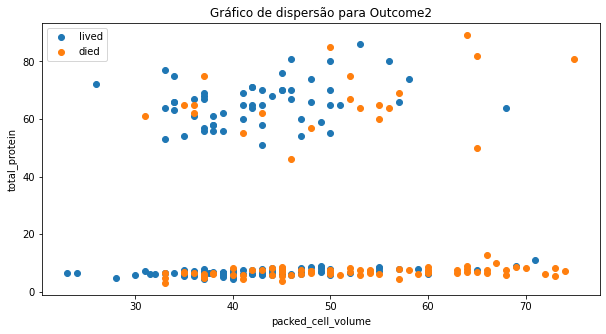

In [58]:
#Gráfico de Dispersão Outcome2 (Packed_cell_volume x Tota_protein)
died = data[data.outcome2 == 'died']
lived = data[data.outcome2 == 'lived']

plt.figure(figsize=(10,5))
plt.scatter(data=lived, x='packed_cell_volume', y='total_protein', label='lived')
plt.scatter(data=died, x='packed_cell_volume', y='total_protein', label='died')

plt.xlabel('packed_cell_volume')
plt.ylabel('total_protein')
plt.title('Gráfico de dispersão para Outcome2')

plt.legend()
plt.show()

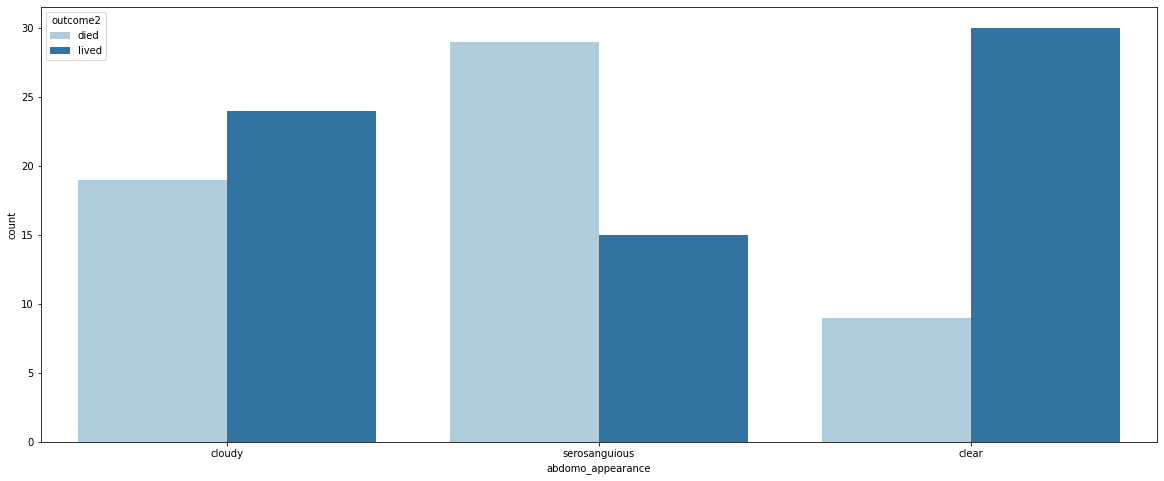

In [59]:
# Atributo 	abdomo_appearance
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='abdomo_appearance', hue='outcome2', palette='Paired')
plt.show()

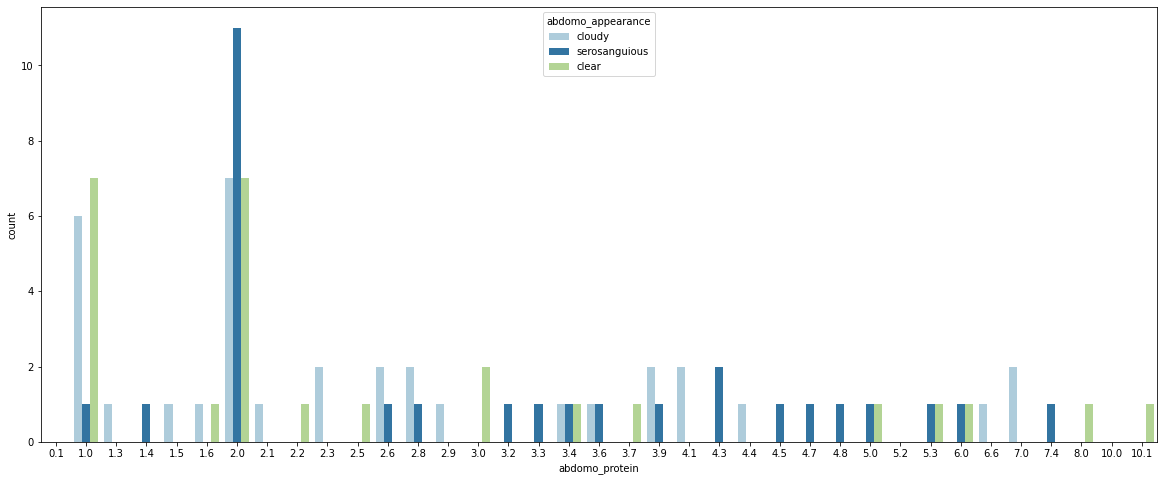

In [60]:
# Atributo 	abdomo_appearance
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='abdomo_protein', hue='abdomo_appearance', palette='Paired')
plt.show()

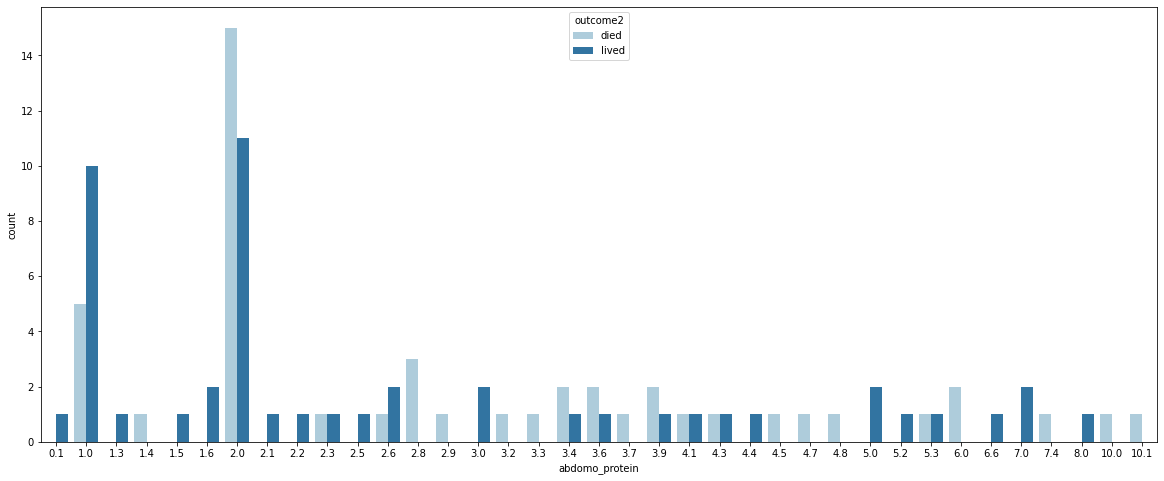

In [61]:
# Atributo 	abdomo_protein
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='abdomo_protein', hue='outcome2', palette='Paired')
plt.show()

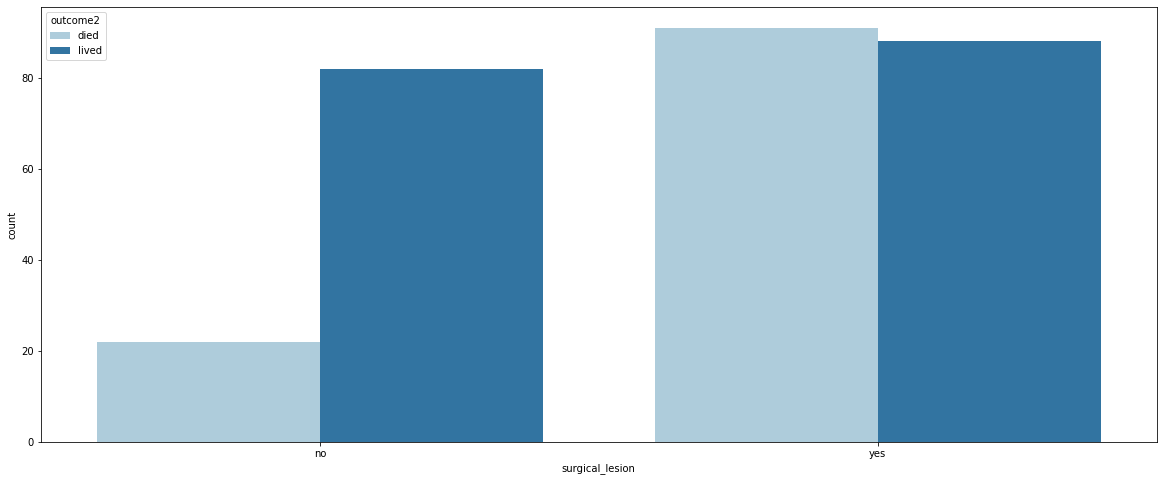

In [62]:
# Atributo surgical_lesion
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='surgical_lesion', hue='outcome2', palette='Paired')
plt.show()

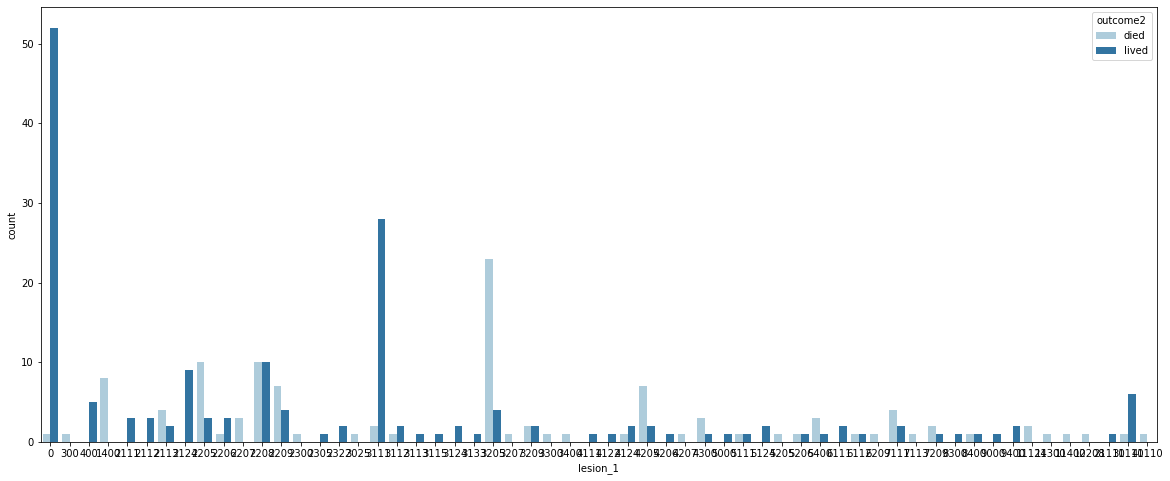

In [63]:
# Atributo 	lesion_1	
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='lesion_1', hue='outcome2', palette='Paired')
plt.show()

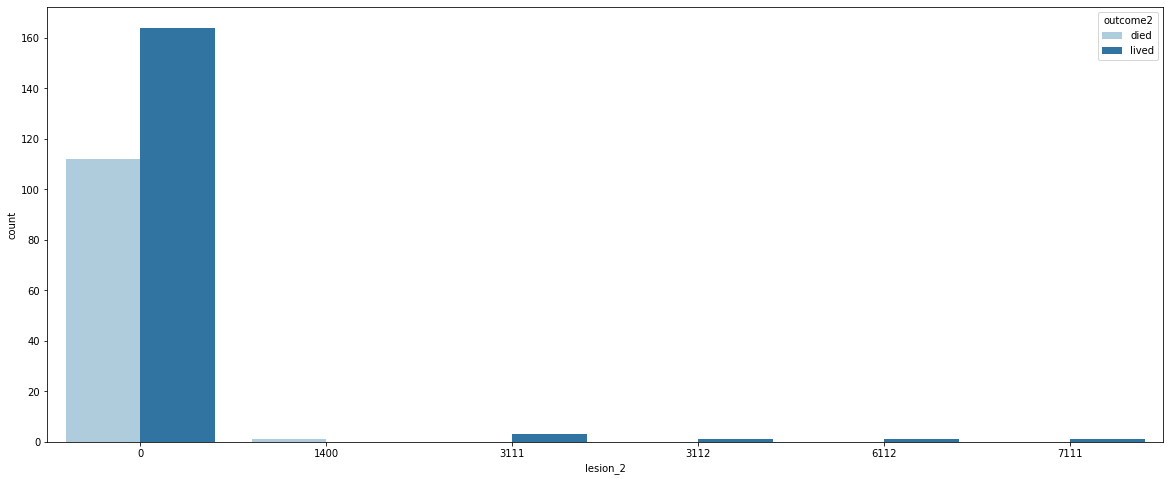

In [64]:
# Atributo 	lesion_2	
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='lesion_2', hue='outcome2', palette='Paired')
plt.show()

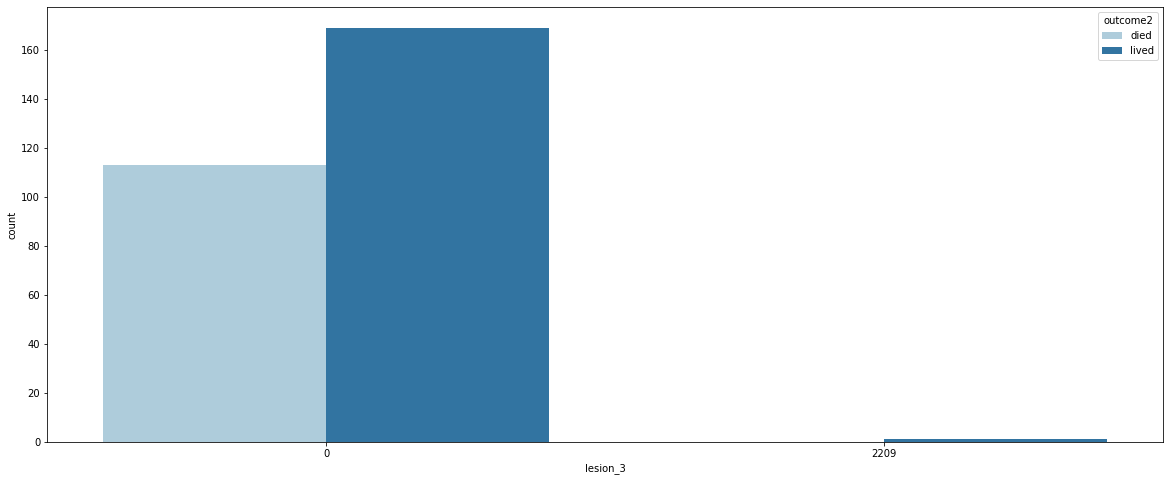

In [65]:
# Atributo 	lesion_3	
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='lesion_3', hue='outcome2', palette='Paired')
plt.show()

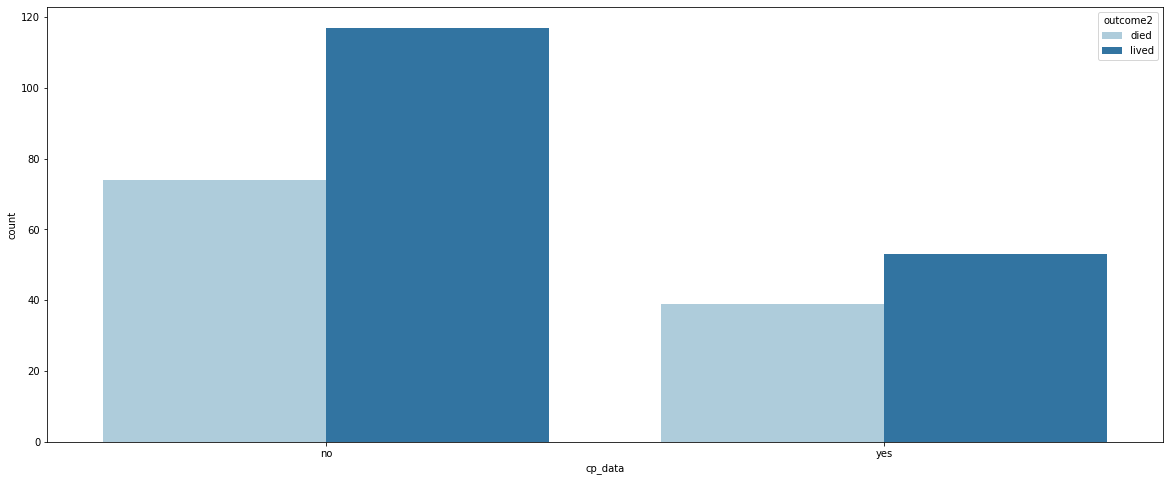

In [66]:
# Atributo cp_data
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='cp_data', hue='outcome2', palette='Paired')
plt.show()

###Pre-Processing

##Missing

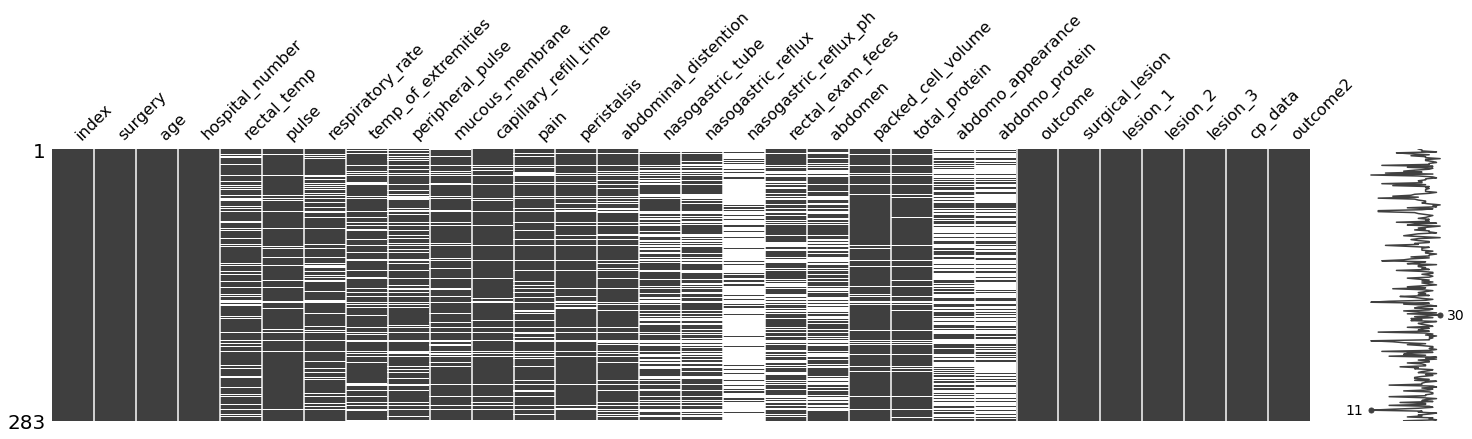

In [67]:
# Visualizar missing - Treino
import missingno as msno
msno.matrix(data, figsize=(25,5));

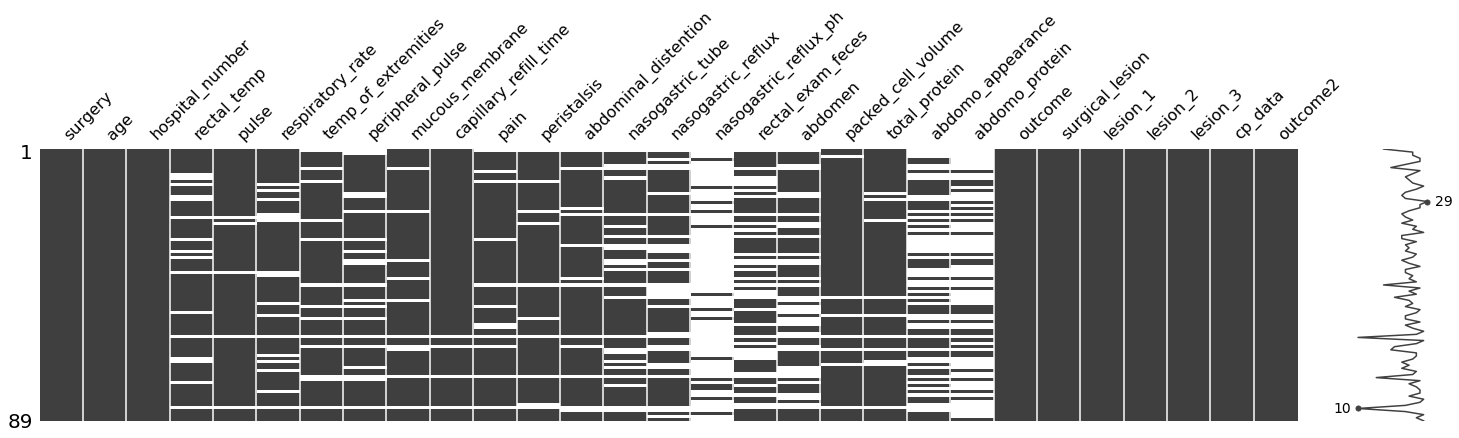

In [68]:
# Visualizar missing - Test
import missingno as msno
msno.matrix(data_test, figsize=(25,5));

In [69]:
# Verificar missing por linha
percent_missing_rows = data.apply(lambda x: x.isnull().sum() * 100 / len(data), axis=1).sort_values(ascending=False)
df = pd.DataFrame({'row_index': data.index, 'percent_missing': percent_missing_rows})
df.head()

,row_index,percent_missing
199,0,6.713781
159,1,6.713781
27,2,6.713781
271,3,6.713781
51,4,6.007067


In [70]:
percent_missing =data.apply(lambda x: x.isnull().sum() * 100 / len(data), axis=0).sort_values(ascending=False)
df = pd.DataFrame({ 'percent_missing': percent_missing})
df.head(35)

,percent_missing
nasogastric_reflux_ph,82.332155
abdomo_protein,66.431095
abdomo_appearance,55.477032
abdomen,40.989399
nasogastric_reflux,37.102473
nasogastric_tube,36.749117
rectal_exam_feces,35.335689
peripheral_pulse,23.674912
rectal_temp,19.434629
temp_of_extremities,19.434629


In [71]:
# Atributos com muitos missing: serão deletados.
att_to_delete = df[0:8].index.values
att_to_delete

array(['nasogastric_reflux_ph', 'abdomo_protein', 'abdomo_appearance',
       'abdomen', 'nasogastric_reflux', 'nasogastric_tube',
       'rectal_exam_feces', 'peripheral_pulse'], dtype=object)

In [72]:
# deletar atributos - Treino
data.drop(att_to_delete, axis=1, inplace=True)
data.shape

(283, 22)

In [73]:
data.head()

,index,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome2
0,0,no,adult,530101,38.5,66.0,28.0,cool,NaN,more_iqual_3_sec,extreme_pain,absent,severe,45.0,8.4,died,no,11300,0,0,no,died
1,1,yes,adult,534817,39.2,88.0,20.0,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,euthanized,no,2208,0,0,no,died
2,2,no,adult,530334,38.3,40.0,24.0,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,lived,no,0,0,0,yes,lived
3,3,yes,young,5290409,39.1,164.0,84.0,cold,dark_cyanotic,more_iqual_3_sec,depressed,absent,severe,48.0,7.2,died,yes,2208,0,0,yes,died
4,4,no,adult,530255,37.3,104.0,35.0,NaN,dark_cyanotic,more_iqual_3_sec,NaN,NaN,NaN,74.0,7.4,died,no,4300,0,0,no,died


In [74]:
data_test.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome2
0,no,adult,1,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_iqual_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no,died
1,no,adult,2,39.1,72.0,52.0,warm,NaN,bright_pink,less_3_sec,depressed,hypermotile,slight,none,none,NaN,absent,distend_small,50.0,7.8,NaN,NaN,lived,yes,2111,0,0,no,lived
2,yes,adult,3,37.2,42.0,12.0,warm,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_large,NaN,7.0,NaN,NaN,lived,no,4124,0,0,no,lived
3,no,young,4,38.0,92.0,28.0,normal,normal,bright_pink,less_3_sec,alert,hypomotile,slight,significant,NaN,7.2,normal,normal,37.0,6.1,clear,NaN,died,no,0,0,0,yes,died
4,yes,adult,5,37.6,64.0,21.0,normal,normal,bright_pink,less_3_sec,depressed,hypomotile,none,none,none,NaN,increased,distend_large,40.0,7.0,clear,NaN,lived,yes,4205,0,0,yes,lived


In [75]:
# deletar atributos - Teste
data_test.drop(att_to_delete, axis=1, inplace=True)
data_test.shape

(89, 21)

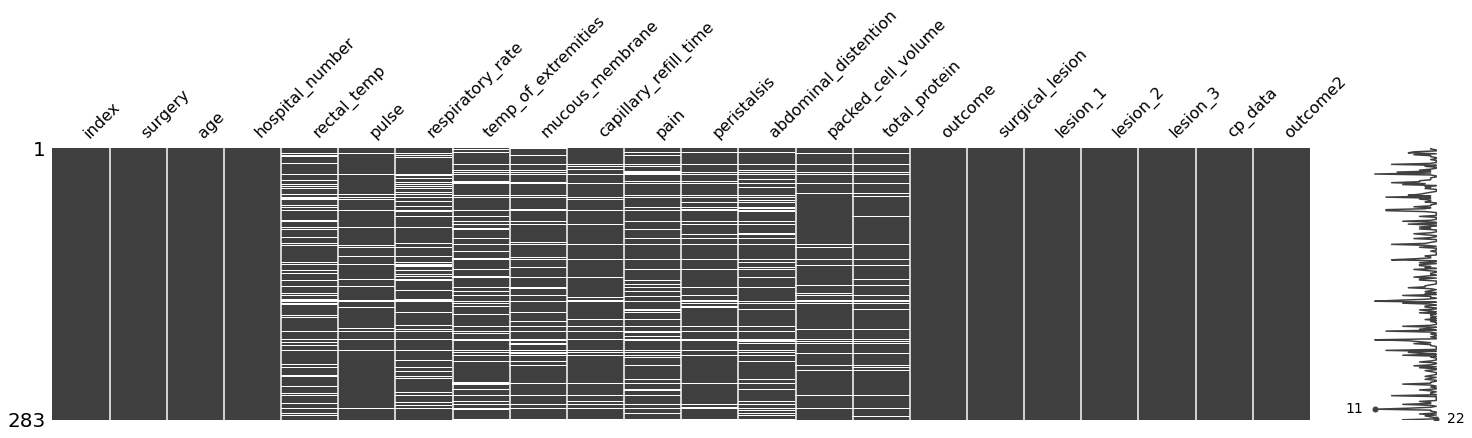

In [76]:
# Visualizar missing - Treino
msno.matrix(data, figsize=(25,5));

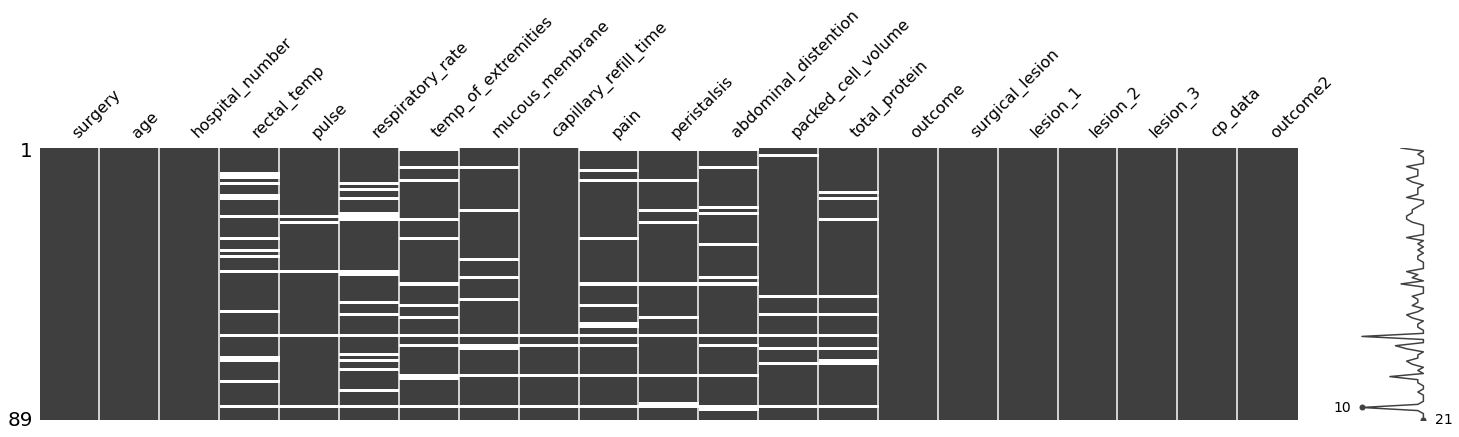

In [77]:
# Visualizar missing - Treino
msno.matrix(data_test, figsize=(25,5));

In [78]:
import sklearn

In [79]:
data.head()

,index,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome2
0,0,no,adult,530101,38.5,66.0,28.0,cool,NaN,more_iqual_3_sec,extreme_pain,absent,severe,45.0,8.4,died,no,11300,0,0,no,died
1,1,yes,adult,534817,39.2,88.0,20.0,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.0,85.0,euthanized,no,2208,0,0,no,died
2,2,no,adult,530334,38.3,40.0,24.0,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.0,6.7,lived,no,0,0,0,yes,lived
3,3,yes,young,5290409,39.1,164.0,84.0,cold,dark_cyanotic,more_iqual_3_sec,depressed,absent,severe,48.0,7.2,died,yes,2208,0,0,yes,died
4,4,no,adult,530255,37.3,104.0,35.0,NaN,dark_cyanotic,more_iqual_3_sec,NaN,NaN,NaN,74.0,7.4,died,no,4300,0,0,no,died


In [80]:
#Separar em Atributos numéricos e categoricos - Treino (excluindo Hospital Number, Lesion 2, Lesion 3, cp_data)
data_numerico = data[['rectal_temp','pulse','respiratory_rate','packed_cell_volume','total_protein']]
data_categorico = data [['surgery','age',	'temp_of_extremities',	'mucous_membrane',	'capillary_refill_time', 'pain', 'peristalsis',	'abdominal_distention', 'surgical_lesion',	'lesion_1',	'outcome2']]
data_categorico.head()

,surgery,age,temp_of_extremities,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,surgical_lesion,lesion_1,outcome2
0,no,adult,cool,NaN,more_iqual_3_sec,extreme_pain,absent,severe,no,11300,died
1,yes,adult,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,no,2208,died
2,no,adult,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,no,0,lived
3,yes,young,cold,dark_cyanotic,more_iqual_3_sec,depressed,absent,severe,yes,2208,died
4,no,adult,NaN,dark_cyanotic,more_iqual_3_sec,NaN,NaN,NaN,no,4300,died


In [81]:
data_numerico.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein
0,38.5,66.0,28.0,45.0,8.4
1,39.2,88.0,20.0,50.0,85.0
2,38.3,40.0,24.0,33.0,6.7
3,39.1,164.0,84.0,48.0,7.2
4,37.3,104.0,35.0,74.0,7.4


In [82]:
#Separar em Atributos numéricos e categoricos - Teste
data_test_numerico = data_test[['rectal_temp','pulse','respiratory_rate','packed_cell_volume','total_protein']]
data_test_categorico = data_test [['surgery','age',	'temp_of_extremities',	'mucous_membrane',	'capillary_refill_time', 'pain', 'peristalsis',	'abdominal_distention', 'surgical_lesion',	'lesion_1',	'outcome2']]
data_test_categorico.head()

,surgery,age,temp_of_extremities,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,surgical_lesion,lesion_1,outcome2
0,no,adult,NaN,dark_cyanotic,more_iqual_3_sec,NaN,NaN,NaN,no,4300,died
1,no,adult,warm,bright_pink,less_3_sec,depressed,hypermotile,slight,yes,2111,lived
2,yes,adult,warm,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,no,4124,lived
3,no,young,normal,bright_pink,less_3_sec,alert,hypomotile,slight,no,0,died
4,yes,adult,normal,bright_pink,less_3_sec,depressed,hypomotile,none,yes,4205,lived


In [83]:
data_test_numerico.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein
0,37.3,104.0,35.0,74.0,7.4
1,39.1,72.0,52.0,50.0,7.8
2,37.2,42.0,12.0,NaN,7.0
3,38.0,92.0,28.0,37.0,6.1
4,37.6,64.0,21.0,40.0,7.0


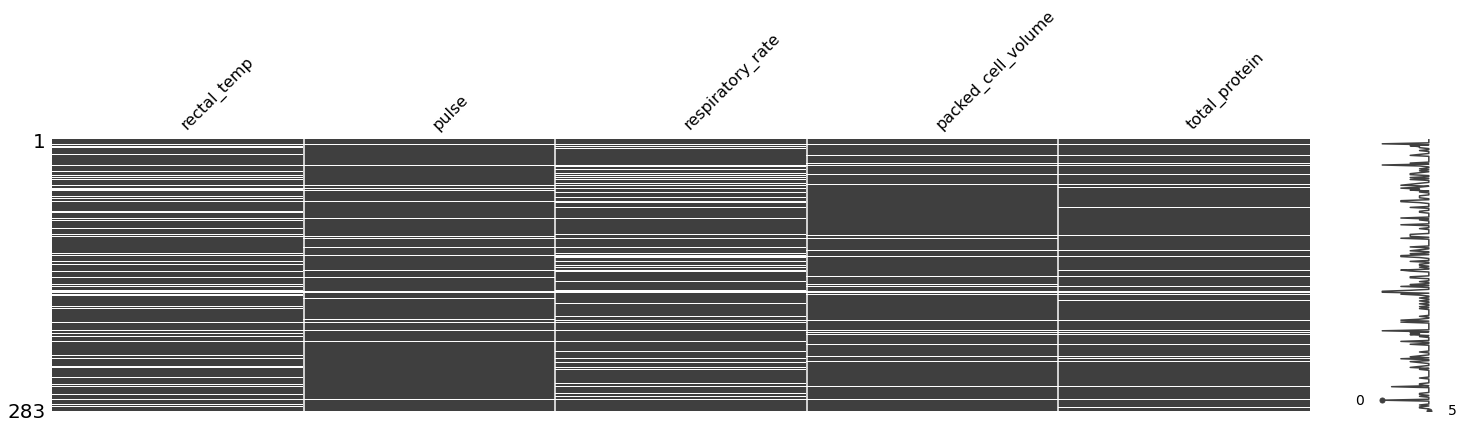

In [84]:
# Visualizar missing - Treino
msno.matrix(data_numerico, figsize=(25,5));

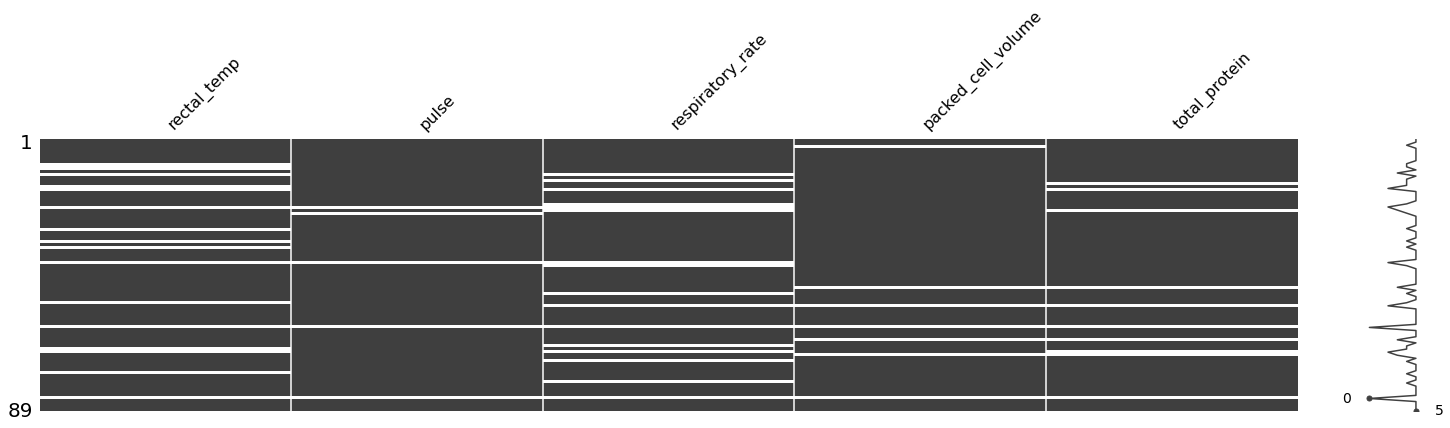

In [85]:
# Visualizar missing - Test
msno.matrix(data_test_numerico, figsize=(25,5));

In [86]:
# Imputar dados faltantes 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(data_numerico) #utiliza base de treino para determinar o modelo
data_numerico = imputer.transform(data_numerico) #passa o modelo na base treino
data_test_numerico = imputer.transform(data_test_numerico) # passa o modelo na base teste

In [87]:
data_numerico=pd.DataFrame(data_numerico, columns=['rectal_temp','pulse','respiratory_rate','packed_cell_volume','total_protein'])
data_numerico.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein
0,38.5,66.0,28.0,45.0,8.4
1,39.2,88.0,20.0,50.0,85.0
2,38.3,40.0,24.0,33.0,6.7
3,39.1,164.0,84.0,48.0,7.2
4,37.3,104.0,35.0,74.0,7.4


In [88]:
data_test_numerico=pd.DataFrame(data_test_numerico, columns=['rectal_temp','pulse','respiratory_rate','packed_cell_volume','total_protein'])
data_test_numerico.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein
0,37.3,104.0,35.0,74.0,7.4
1,39.1,72.0,52.0,50.0,7.8
2,37.2,42.0,12.0,44.0,7.0
3,38.0,92.0,28.0,37.0,6.1
4,37.6,64.0,21.0,40.0,7.0


In [89]:
# Verificar se temos mais algum missing - treino
print(np.isnan(data_numerico).sum())

rectal_temp           0
pulse                 0
respiratory_rate      0
packed_cell_volume    0
total_protein         0
dtype: int64


In [90]:
# Verificar se temos mais algum missing - test
print(np.isnan(data_test_numerico).sum())

rectal_temp           0
pulse                 0
respiratory_rate      0
packed_cell_volume    0
total_protein         0
dtype: int64


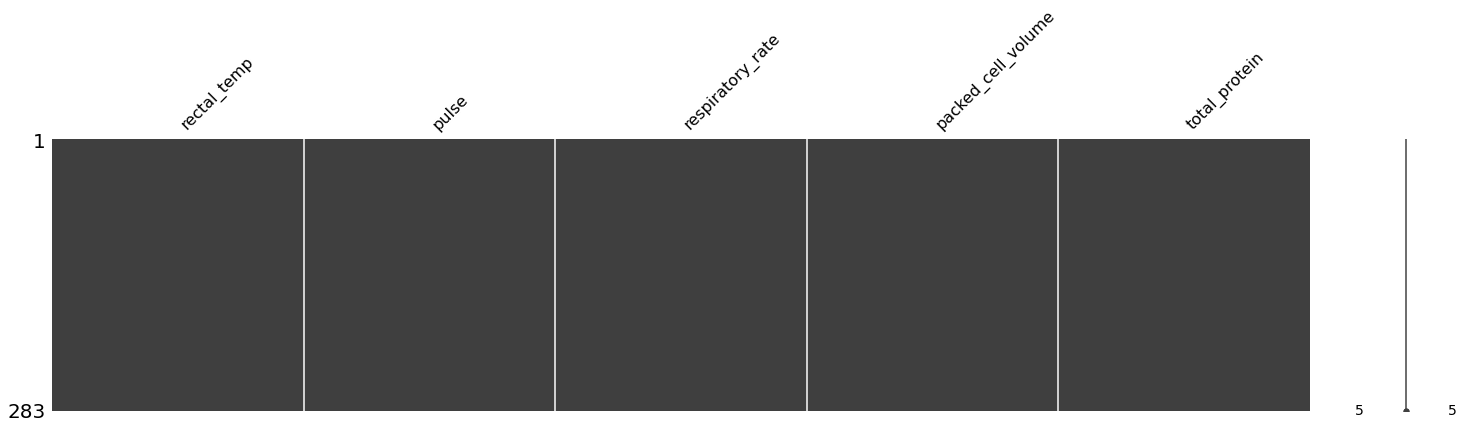

In [91]:
# Visualizar missing - treino
msno.matrix(data_numerico, figsize=(25,5));

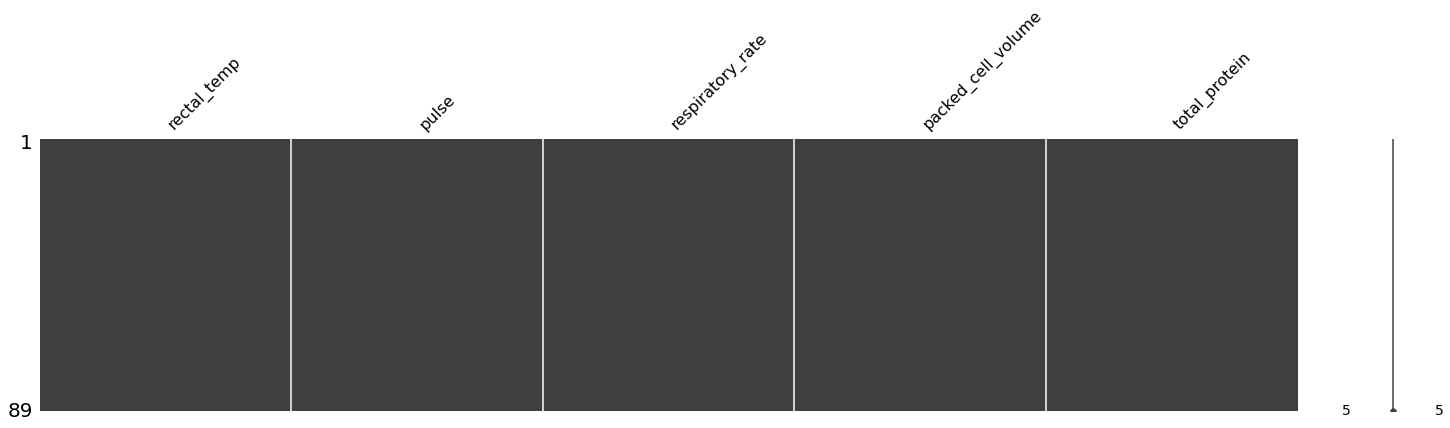

In [92]:
# Visualizar missing - test
msno.matrix(data_test_numerico, figsize=(25,5));

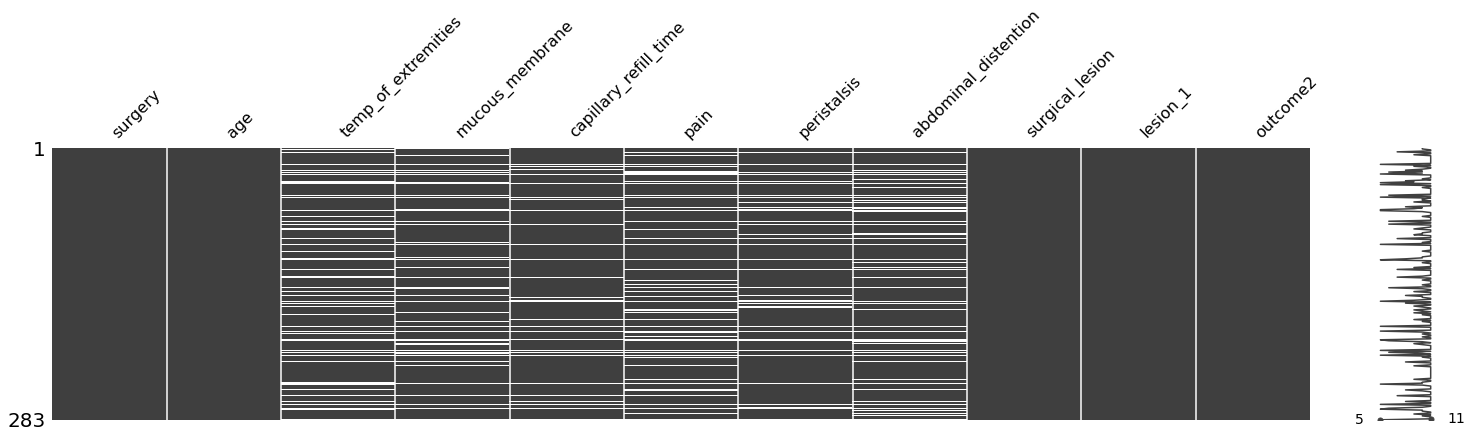

In [93]:
# Visualizar missing - treino
msno.matrix(data_categorico, figsize=(25,5));

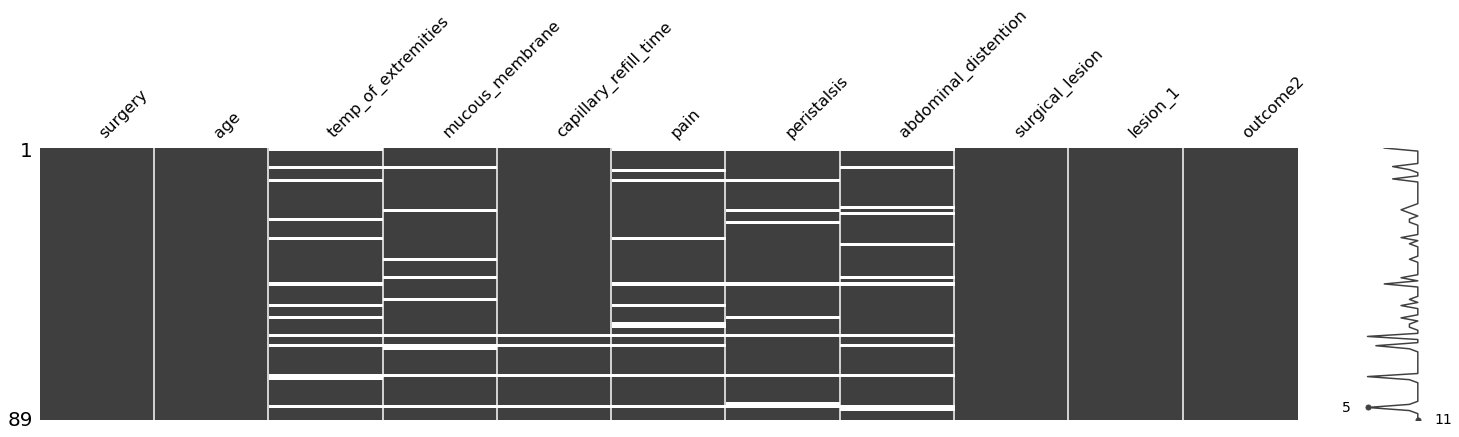

In [94]:
# Visualizar missing - test
msno.matrix(data_test_categorico, figsize=(25,5));

In [95]:
# Imputar dados faltantes 
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(data_categorico) #utiliza a base de treino para treinar o modelo
data_categorico = imputer.transform(data_categorico) # aplica na base de treino
data_test_categorico = imputer.transform(data_test_categorico) # aplica na base de test

In [96]:
data_categorico=pd.DataFrame(data_categorico, columns=['surgery','age', 'temp_of_extremities',	'mucous_membrane',	'capillary_refill_time', 'pain', 'peristalsis',	'abdominal_distention', 'surgical_lesion',	'lesion_1',	'outcome2'])
data_categorico.head()

,surgery,age,temp_of_extremities,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,surgical_lesion,lesion_1,outcome2
0,no,adult,cool,normal_pink,more_iqual_3_sec,extreme_pain,absent,severe,no,11300,died
1,yes,adult,cool,pale_cyanotic,less_3_sec,mild_pain,absent,slight,no,2208,died
2,no,adult,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,no,0,lived
3,yes,young,cold,dark_cyanotic,more_iqual_3_sec,depressed,absent,severe,yes,2208,died
4,no,adult,cool,dark_cyanotic,more_iqual_3_sec,mild_pain,hypomotile,none,no,4300,died


In [97]:
data_test_categorico=pd.DataFrame(data_test_categorico, columns=['surgery','age',	'temp_of_extremities',	'mucous_membrane',	'capillary_refill_time', 'pain', 'peristalsis',	'abdominal_distention', 'surgical_lesion',	'lesion_1',	'outcome2'])
data_test_categorico.head()

,surgery,age,temp_of_extremities,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,surgical_lesion,lesion_1,outcome2
0,no,adult,cool,dark_cyanotic,more_iqual_3_sec,mild_pain,hypomotile,none,no,4300,died
1,no,adult,warm,bright_pink,less_3_sec,depressed,hypermotile,slight,yes,2111,lived
2,yes,adult,warm,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,no,4124,lived
3,no,young,normal,bright_pink,less_3_sec,alert,hypomotile,slight,no,0,died
4,yes,adult,normal,bright_pink,less_3_sec,depressed,hypomotile,none,yes,4205,lived


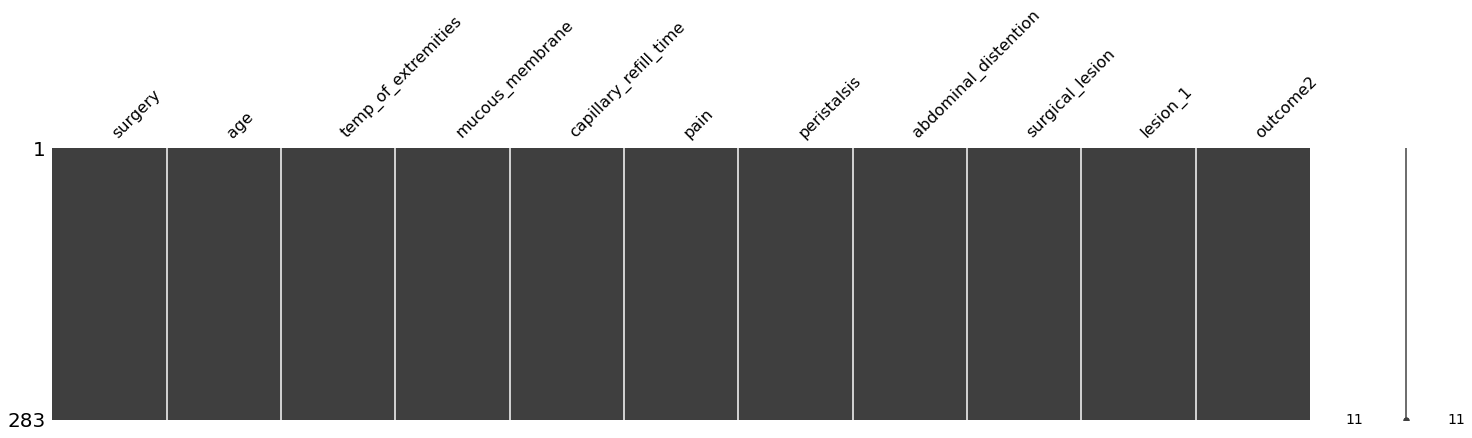

In [98]:
# Visualizar missing - Treino
msno.matrix(data_categorico, figsize=(25,5));

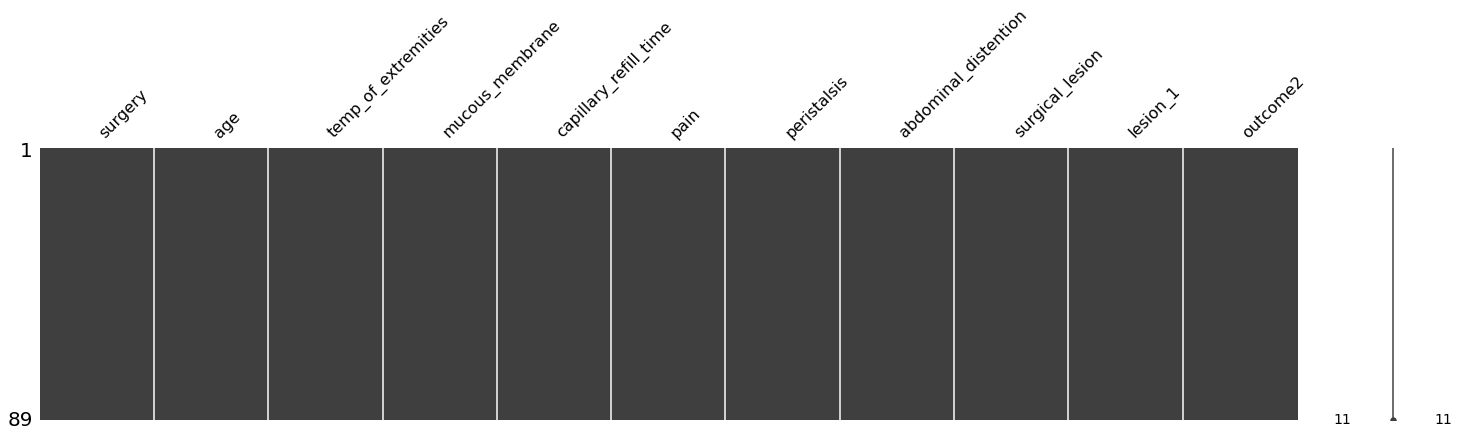

In [99]:
# Visualizar missing - Test
msno.matrix(data_test_categorico, figsize=(25,5));

##Machine Learning

## Separar bases de treino e teste

In [102]:
#definir X_train e y_train
data_treino= pd.concat([data_numerico,data_categorico],axis=1)
X_train=np.array(data_treino.loc[:,data_treino.columns != 'outcome2'])
y_train=np.array(data_treino ['outcome2'])
X_train
y_train

array(['died', 'died', 'lived', 'died', 'died', 'lived', 'lived', 'died',
       'died', 'lived', 'lived', 'lived', 'lived', 'died', 'lived',
       'died', 'died', 'lived', 'lived', 'lived', 'lived', 'lived',
       'lived', 'lived', 'lived', 'lived', 'lived', 'died', 'lived',
       'died', 'died', 'lived', 'lived', 'died', 'died', 'lived', 'died',
       'died', 'lived', 'lived', 'died', 'died', 'died', 'lived', 'lived',
       'died', 'lived', 'died', 'lived', 'lived', 'died', 'lived', 'died',
       'died', 'lived', 'lived', 'died', 'died', 'lived', 'lived',
       'lived', 'lived', 'lived', 'died', 'died', 'died', 'died', 'lived',
       'lived', 'lived', 'died', 'lived', 'lived', 'lived', 'lived',
       'died', 'died', 'lived', 'lived', 'lived', 'died', 'lived', 'died',
       'lived', 'lived', 'died', 'lived', 'lived', 'lived', 'died',
       'lived', 'lived', 'died', 'lived', 'lived', 'lived', 'died',
       'died', 'lived', 'lived', 'died', 'lived', 'lived', 'died',
       '

In [103]:
X_train

array([[38.5, 66.0, 28.0, ..., 'severe', 'no', 11300],
       [39.2, 88.0, 20.0, ..., 'slight', 'no', 2208],
       [38.3, 40.0, 24.0, ..., 'none', 'no', 0],
       ...,
       [37.5, 72.0, 30.0, ..., 'moderate', 'yes', 3205],
       [36.5, 100.0, 24.0, ..., 'moderate', 'yes', 2208],
       [37.2, 40.0, 20.0, ..., 'none', 'no', 6112]], dtype=object)

In [104]:
#definir X_test e y_test
data_test= pd.concat([data_test_numerico,data_test_categorico],axis=1)
X_test=np.array(data_test.loc[:,data_test.columns != 'outcome2'])
y_test=np.array(data_test ['outcome2'])
X_test
y_test

array(['died', 'lived', 'lived', 'died', 'lived', 'lived', 'lived',
       'lived', 'lived', 'died', 'died', 'died', 'died', 'lived', 'died',
       'died', 'died', 'lived', 'lived', 'lived', 'died', 'died', 'died',
       'lived', 'died', 'lived', 'lived', 'lived', 'lived', 'lived',
       'lived', 'lived', 'lived', 'lived', 'died', 'died', 'lived',
       'lived', 'lived', 'lived', 'died', 'lived', 'lived', 'lived',
       'died', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'died', 'lived', 'lived', 'died', 'lived', 'lived', 'lived',
       'died', 'died', 'lived', 'lived', 'lived', 'died', 'lived',
       'lived', 'lived', 'died', 'died', 'died', 'lived', 'died', 'died',
       'died', 'lived', 'died', 'died', 'lived', 'died', 'lived', 'died',
       'died', 'lived', 'died', 'lived', 'lived', 'died', 'died', 'lived'],
      dtype=object)

In [105]:
X_test

array([[37.3, 104.0, 35.0, ..., 'none', 'no', 4300],
       [39.1, 72.0, 52.0, ..., 'slight', 'yes', 2111],
       [37.2, 42.0, 12.0, ..., 'moderate', 'no', 4124],
       ...,
       [38.9, 80.0, 44.0, ..., 'moderate', 'yes', 7111],
       [37.0, 66.0, 20.0, ..., 'moderate', 'yes', 31110],
       [36.5, 100.0, 24.0, ..., 'moderate', 'yes', 2208]], dtype=object)

In [106]:
# Verificar proporções. amostragem estratificada
data_treino['outcome2'].value_counts()

lived    170
died     113
Name: outcome2, dtype: int64

In [107]:
# Verificar proporções. amostragem estratificada
data_test['outcome2'].value_counts()

lived    53
died     36
Name: outcome2, dtype: int64

In [109]:
pd.DataFrame(y_train).value_counts()

lived    170
died     113
dtype: int64

In [110]:
pd.DataFrame(y_test).value_counts()

lived    53
died     36
dtype: int64

###SVM

In [111]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first',handle_unknown='ignore')
enc.fit(X_train)
OneHotEncoder(handle_unknown='ignore')
X_train=enc.transform(X_train)
X_test=enc.transform(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [14] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [112]:
X_train

<283x337 sparse matrix of type '<class 'numpy.float64'>'
	with 3277 stored elements in Compressed Sparse Row format>

In [113]:
X_test

<89x337 sparse matrix of type '<class 'numpy.float64'>'
	with 1046 stored elements in Compressed Sparse Row format>

In [114]:
# treinar modelo - Support Machine Vector
from sklearn.svm import SVC

def train(X_train, y_train, seed):
  model = SVC(random_state=seed)  # crio o modelo
  model.fit(X_train, y_train)     # treino o modelo
  return model

model = train(X_train, y_train, seed)

Resultados de Treino
Acurácia:  0.9434628975265018
Kappa:  0.8796448886289937


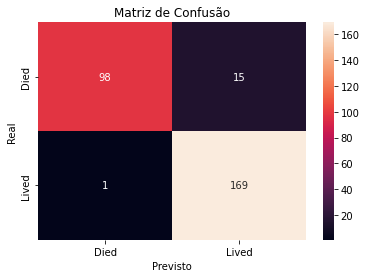

Resultados de Teste
Acurácia:  0.9325842696629213
Kappa:  0.8575240128068303


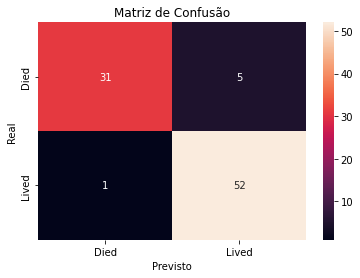

In [115]:
def predict_and_evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test) # inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  #from sklearn.metrics import f1_score
  #f1 = f1_score(y_test, y_pred)
  #print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Died', 'Lived']) 
  ax.yaxis.set_ticklabels(['Died', 'Lived'])
  plt.show()

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

## Árvore de Decisão

In [116]:
X_train.shape

(283, 337)

In [117]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
model.fit(X_train, y_train);

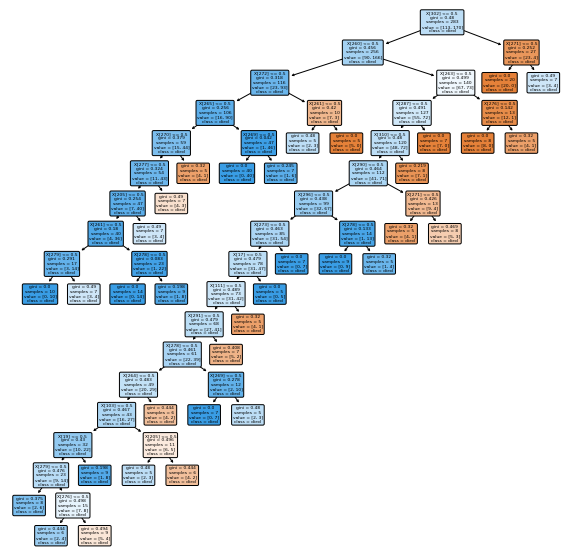

In [120]:
# Visualização gráfica da árvore de decisão
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model, class_names=y_train, filled=True, rounded=True); # plota a árvore

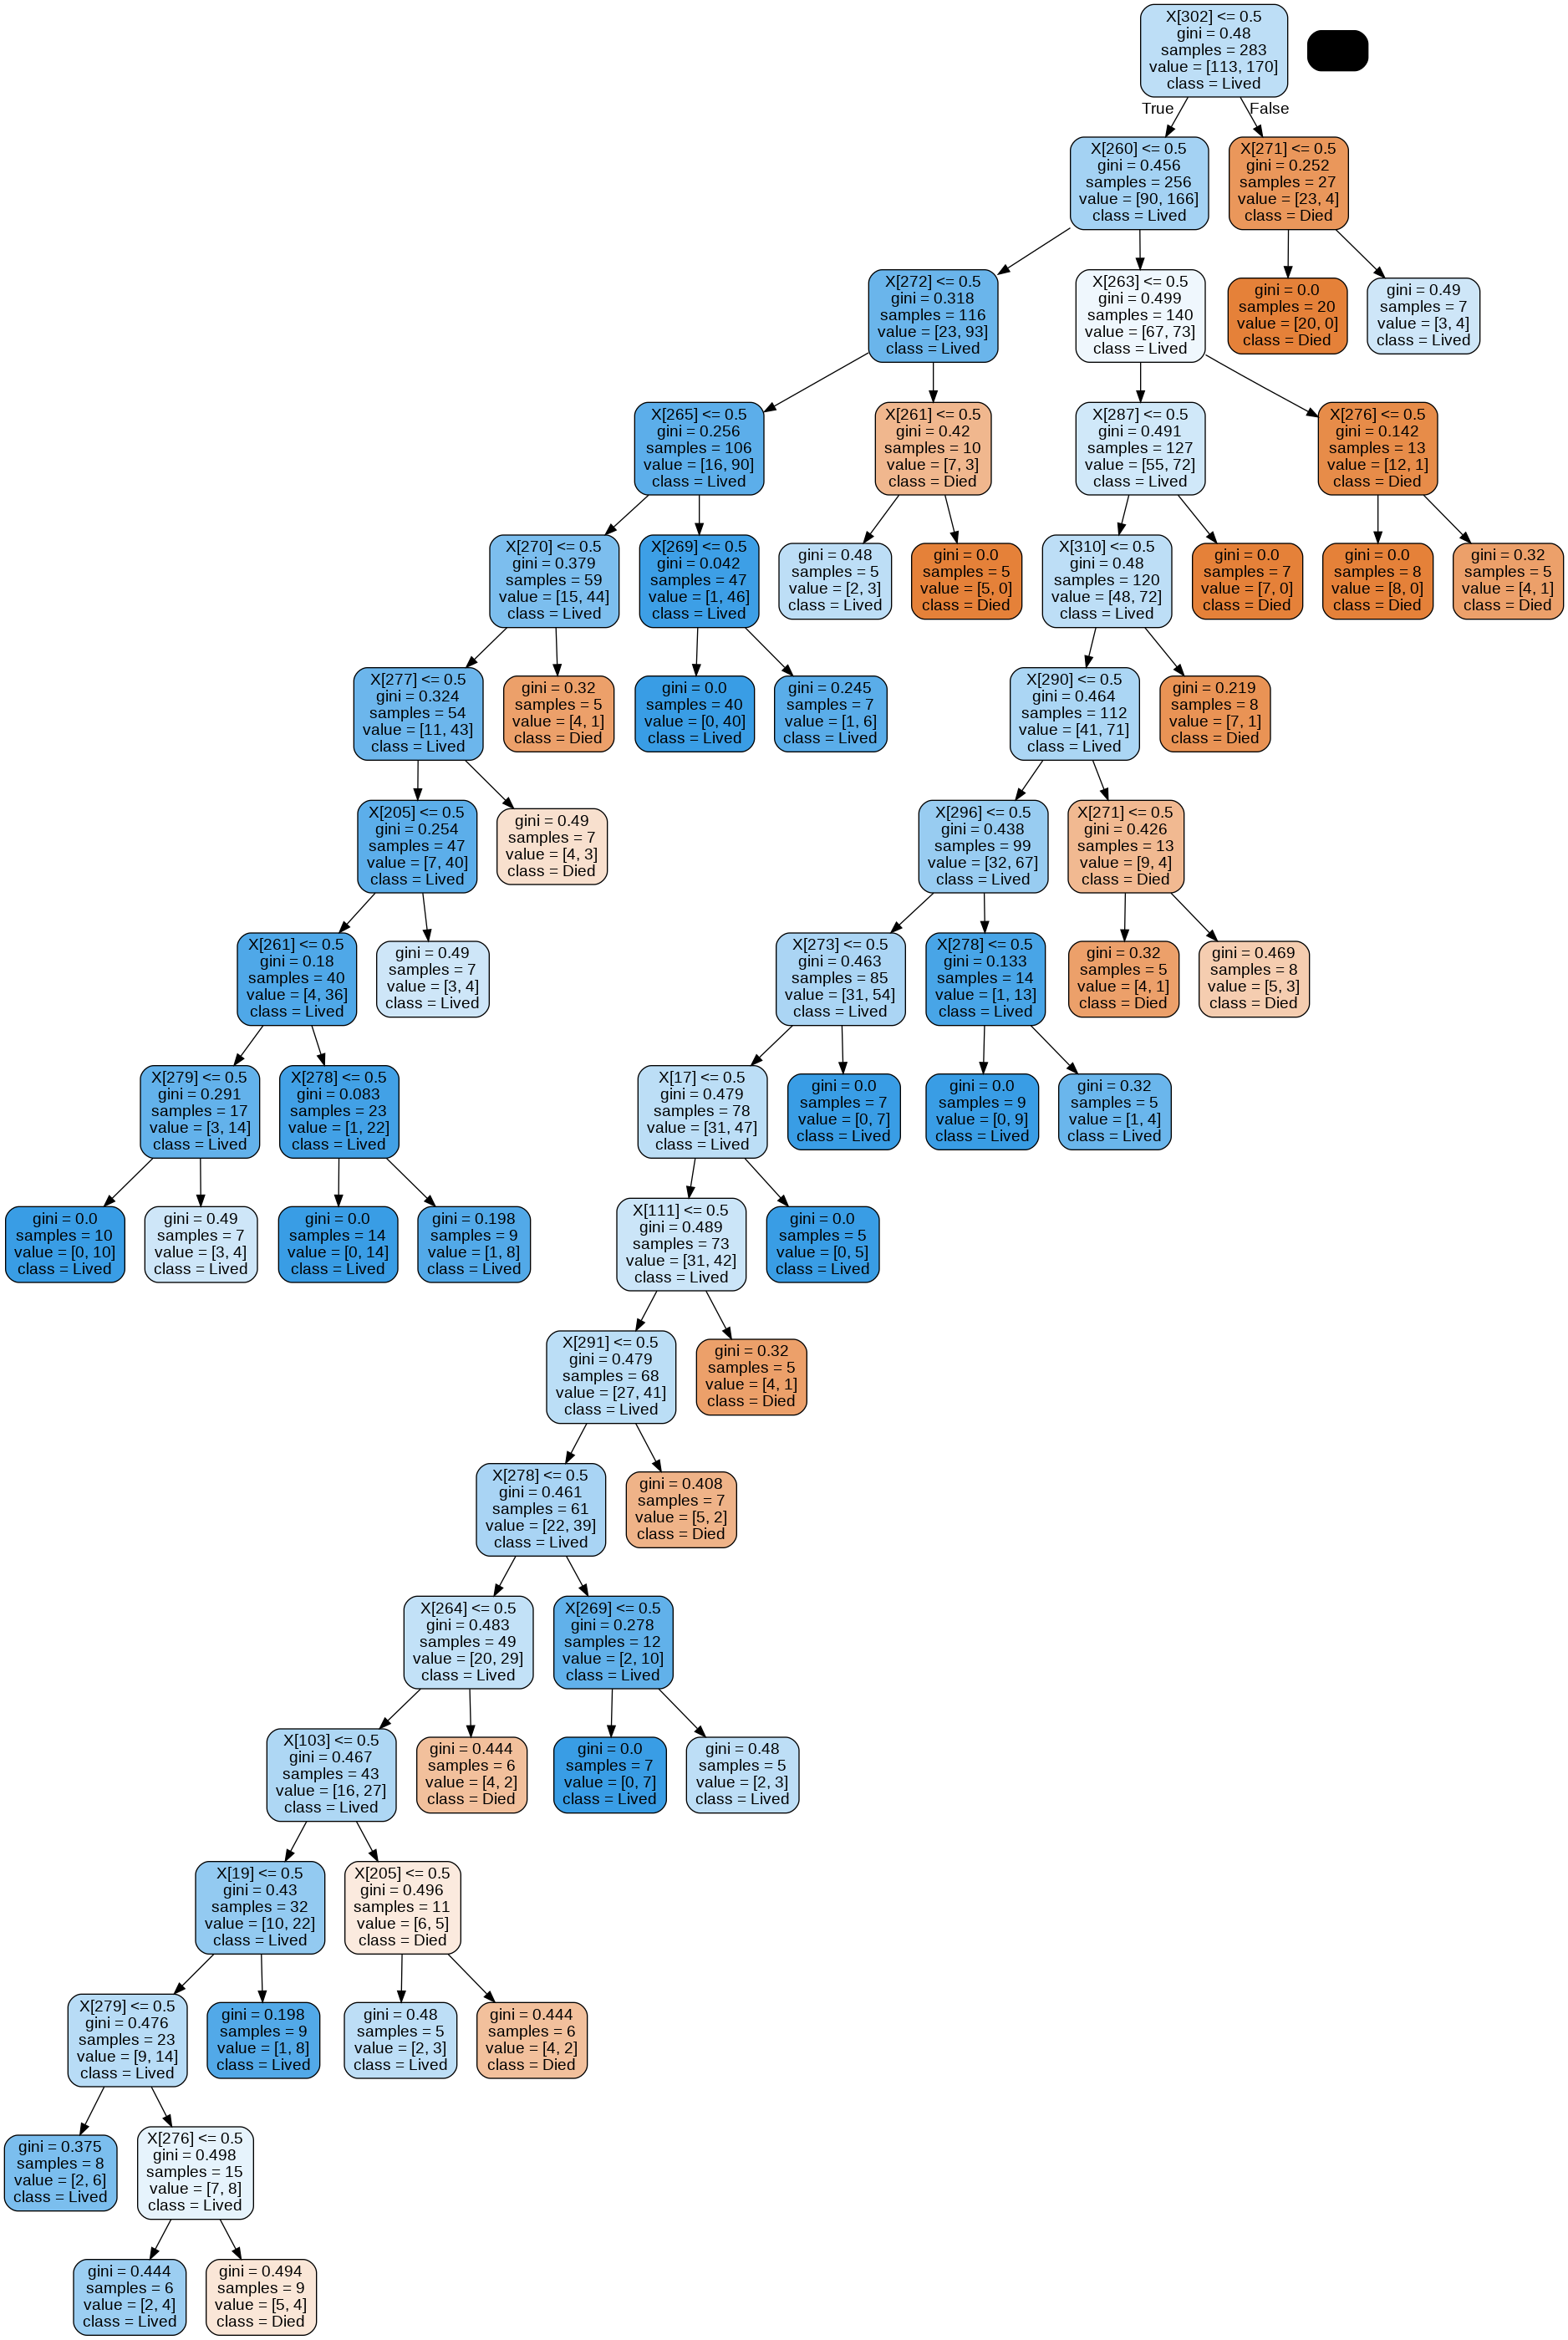

In [121]:
# OU
# Visualização gráfica da árvore de decisão
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(model, #feature_names=list(pd.DataFrame(X_train).columns.values), 
                           class_names=['Died', 'Lived'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Resultados de Treino
Acurácia:  0.8445229681978799
Kappa:  0.6749334307941315


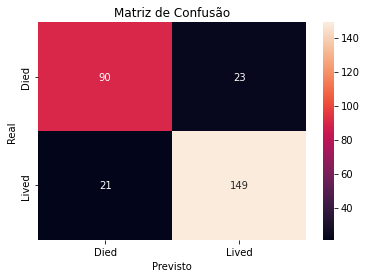

Resultados de Teste
Acurácia:  0.797752808988764
Kappa:  0.5725720384204909


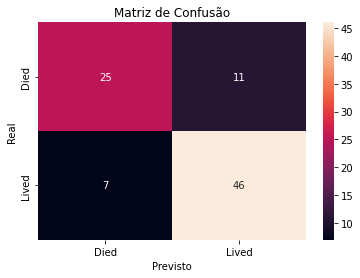

In [122]:
def predict_and_evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test) # inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  #from sklearn.metrics import f1_score
  #f1 = f1_score(y_test, y_pred)
  #print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Died', 'Lived']) 
  ax.yaxis.set_ticklabels(['Died', 'Lived'])
  plt.show()

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

###Normalizar

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False).fit(X_train) # gero o modelo de pré-processamento no treino
X_train = scaler.transform(X_train) # aplico o modelo no treino
X_test = scaler.transform(X_test)   # aplico o modelo no teste

In [129]:
# treinar modelo - Support Machine Vector
from sklearn.svm import SVC

def train(X_train, y_train, seed):
  model = SVC(random_state=seed)  # crio o modelo
  model.fit(X_train, y_train)     # treino o modelo
  return model

model = train(X_train, y_train, seed)

Resultados de Treino
Acurácia:  0.9681978798586572
Kappa:  0.9328092436753106


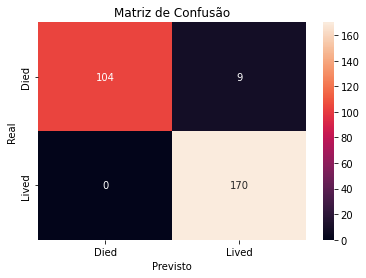

Resultados de Teste
Acurácia:  0.9775280898876404
Kappa:  0.9533542976939203


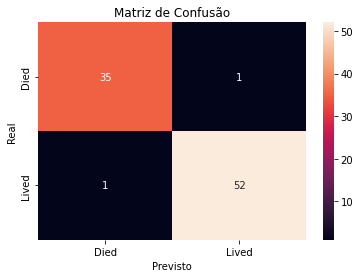

In [130]:
def predict_and_evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test) # inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  #from sklearn.metrics import f1_score
  #f1 = f1_score(y_test, y_pred)
  #print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Died', 'Lived']) 
  ax.yaxis.set_ticklabels(['Died', 'Lived'])
  plt.show()

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

###Grid Search

In [134]:
from sklearn.model_selection import GridSearchCV

# Definir parâmetros a serem utilizados
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                     
# Executar o grid search
model = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy')
model.fit(X_train, y_train);

In [135]:
model.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Resultados de Treino
Acurácia:  0.9293286219081273
Kappa:  0.8490988589100992


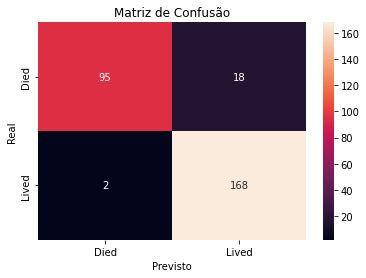

Resultados de Teste
Acurácia:  0.9213483146067416
Kappa:  0.8330206378986866


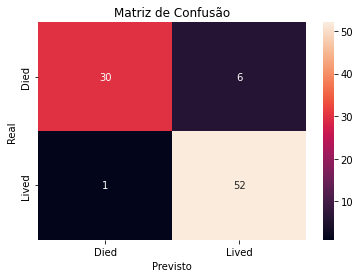

In [136]:
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

In [137]:
# https://github.com/scikit-learn-contrib/imbalanced-learn
!pip install -U imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=seed);
X_train, y_train = sampler.fit_resample(X_train, y_train)

# Usar a biblioteca acima é uma opção, mas não conseguimos configurar o sampling. No caso do undersampling, ele sempre reduzirá a classe majoritária para o tamanho da minoritária...
# Essa biblioteca tem diversos outros métodos para balanceamento.

In [150]:
y_train_bal=pd.DataFrame(y_train,columns=['outcome'])
y_train_bal.head()

,outcome
0,died
1,died
2,died
3,died
4,died


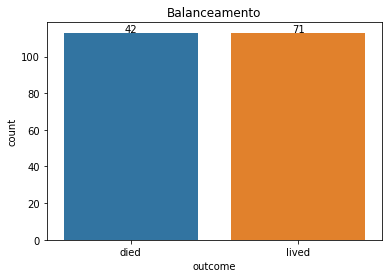

In [151]:
# Balanceamento
graph = sns.countplot(data=y_train_bal, x='outcome')
plt.title('Balanceamento')

for idx, bar in enumerate(graph.patches):
    height = bar.get_height()
    graph.text(x=bar.get_x() + bar.get_width()/2., y=height + 0.1, s=(data['outcome'].value_counts()).sort_values()[idx], ha="center")

plt.show()

In [138]:
# treinar modelo - Support Machine Vector
from sklearn.svm import SVC

def train(X_train, y_train, seed):
  model = SVC(random_state=seed)  # crio o modelo
  model.fit(X_train, y_train)     # treino o modelo
  return model

model = train(X_train, y_train, seed)

Resultados de Treino
Acurácia:  0.9778761061946902
Kappa:  0.9557522123893806


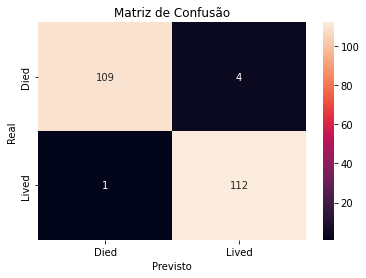

Resultados de Teste
Acurácia:  0.9101123595505618
Kappa:  0.8182746299132211


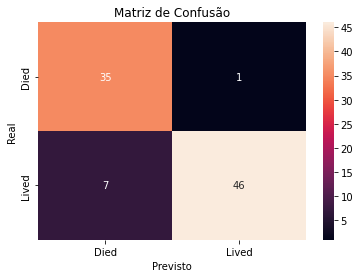

In [139]:
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)